###### Vinecia Haugsness "K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.

# Topeka Healthcare Social Media Presence Comparison


### Stormont-Vail Health vs.  The University of Kansas Health Systems - St. Francis Campus
For my capston I am analyzing the two major healthcare organizations in Topeka, Kansas.    Social Media continues to grow as an influence on todays marketplace for all products.    What does the presence of these two facilities look like on Facebook and Twitter?   What makes us similiar?  What stands apart?    Who is doing what better?    Knowing the recent history of St. Francis recently being almost closed and then purchased by Ardent and KU Medical center,  is that influencing activity?

### Data Sources:
https://facebook.com/stormontvailhealth<br/>
https://twitter.com/stormontvail<br/>
<br/>
https://facebook.com/kutopeka<br/>
https://twitter.com/stfrancistopeka<br/>
<br/>
https://vineciahaugsness.imgur.com/all/<br/>

## Collecting Facebook data

In [1]:
import facebook
import json
import requests
import urllib2
import json
import datetime
import csv
import time
import pandas as pd
import numpy
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt
% matplotlib inline

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
from gensim import corpora, models, similarities

sv = "Stormont:"
sf = "St. Francis:"

In [2]:
access_token='EAACEdEose0cBAFzL9kfyjbpQMcw9JkNQsG7kGNqoJDyw23tQxX9snBSarc2or8wrZC6ofCA5uZC510qgEHflEZBuCyXfdvvoUHx6SUKPoJbEVZCa5ANN9X8fOoV7ImBMnzkiQkLNhx10yd9Mvje3hsc5pfEgZAr6twzBSFlQ6o6Uya4nh4s0WNB0sagcs0WEZD'
graph = facebook.GraphAPI(access_token, version='2.7')

In [3]:
# function to print the output pretty ("pretty print")
def pp(input):
    print json.dumps(input, indent=1)

In [4]:
page_id = 'StormontVailHealth'    #Stormont-Vail Hospital

fields = "message,link,created_time,type,name,id," + \
            "comments.limit(0).summary(true),shares,reactions" + \
            ".limit(0).summary(true)"
        
svdata = graph.get_object(id='StormontVailHealth/feed/', fields=fields, since='2017-4-10')

#####

page_id = 'kutopeka'    #St. Francis Hospital

fields = "message,link,created_time,type,name,id," + \
            "comments.limit(0).summary(true),shares,reactions" + \
            ".limit(0).summary(true)"
        
sfdata = graph.get_object(id='kutopeka/feed/', fields=fields, since='2017-4-10')

# 12 months worth of data

In [5]:
print sv
print svdata.keys()
print sf
print sfdata.keys()

Stormont:
[u'paging', u'data']
St. Francis:
[u'paging', u'data']


In [6]:
print sv
svdf = pd.DataFrame.from_dict(svdata['data'])
svdf.head()

Stormont:


,comments,created_time,id,link,message,name,reactions,shares,type
0,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-05-01T19:54:14+0000,60337991274_10155577245796275,https://www.facebook.com/StormontVailHealth/ph...,Stormont Vail Health and Cotton O’Neil perform...,NaN,"{u'data': [], u'summary': {u'total_count': 3, ...",{u'count': 28},photo
1,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-05-01T16:39:09+0000,60337991274_10155576878396275,https://www.rd.com/health/diet-weight-loss/the...,"Cheryl Mussatto, MS, RD, Diabetes Learning Cen...",The Healthy Diet Plan Nutritionists Use to Los...,"{u'data': [], u'summary': {u'total_count': 4, ...",{u'count': 3},link
2,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-30T17:05:49+0000,60337991274_10155574639681275,https://www.facebook.com/StormontVailHealth/vi...,"Charisse Symmonds, D.O., Cotton O’Neil Emporia...",Get Moving,"{u'data': [], u'summary': {u'total_count': 19,...",{u'count': 12},video
3,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-29T17:33:00+0000,60337991274_10155572515871275,https://www.facebook.com/StormontVailHealth/ph...,Thank you to the Leadership Greater Topeka cla...,Timeline Photos,"{u'data': [], u'summary': {u'total_count': 61,...",{u'count': 9},photo
4,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-28T16:33:00+0000,60337991274_10155520617336275,https://www.facebook.com/StormontVailHealth/ph...,Wearing sunscreen is important for protecting ...,NaN,"{u'data': [], u'summary': {u'total_count': 8, ...",{u'count': 6},photo


In [7]:
print sf
sfdf = pd.DataFrame.from_dict(sfdata['data'])
sfdf.head()

St. Francis:


,comments,created_time,id,link,message,name,reactions,shares,type
0,"{u'data': [], u'summary': {u'total_count': 1, ...",2018-05-01T20:10:17+0000,8769808542_10155581677798543,https://www.facebook.com/kutopeka/photos/a.101...,Did you know The University of Kansas Health S...,NaN,"{u'data': [], u'summary': {u'total_count': 16,...",{u'count': 10},photo
1,"{u'data': [], u'summary': {u'total_count': 7, ...",2018-04-27T14:00:01+0000,8769808542_10155570536373543,https://www.facebook.com/kutopeka/photos/a.101...,As Medical Laboratory Professionals week concl...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 137...",{u'count': 13},photo
2,"{u'data': [], u'summary': {u'total_count': 2, ...",2018-04-26T17:25:18+0000,8769808542_10155570263418543,https://www.facebook.com/kutopeka/photos/a.101...,Treats for a cause! To show our appreciation f...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 122...",{u'count': 13},photo
3,"{u'data': [], u'summary': {u'total_count': 1, ...",2018-04-25T18:14:51+0000,8769808542_10155568175383543,https://www.facebook.com/kutopeka/photos/a.101...,"Yesterday, we held a free ""Hands-Only CPR Cour...",Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 29,...",{u'count': 4},photo
4,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-24T20:05:03+0000,8769808542_10155566155588543,http://www.wibw.com/content/news/Local-hospita...,Do you and your family know how to perform Han...,Local hospital hosts 'hands only' CPR course,"{u'data': [], u'summary': {u'total_count': 28,...",{u'count': 5},link


In [8]:
# retrieve data
svurl = svdata['paging']['next']
svreq = urllib2.Request(svurl)
svresponse = urllib2.urlopen(svreq)
svdata = json.loads(svresponse.read())

# retrieve data
sfurl = sfdata['paging']['next']
sfreq = urllib2.Request(sfurl)
sfresponse = urllib2.urlopen(sfreq)
sfdata = json.loads(sfresponse.read())

In [9]:
page_id = 'StormontVailHealth'    #Stormont-Vail Health

svalldata=[]
      
fields="message,link,created_time,type,name,id,comments.limit(0).summary(true),shares,reactions.limit(0).summary(true)"

svdata = graph.get_object(id='StormontVailHealth/feed/', fields=fields, since='2017-4-10')

# retrieve data
while(True):
    try:
        for i in svdata['data']:
            svalldata.append(i)
        # Attempt to make a request to the next page of data, if it exists.
        svdata=requests.get(svdata['paging']['next']).json()
    except KeyError:
        # When there are no more pages (['paging']['next']), break from the
        # loop and end the script.
        break

##############################################################

page_id = 'kutopeka'    #St. Francis 

sfalldata=[]
      
fields="message,link,created_time,type,name,id,comments.limit(0).summary(true),shares,reactions.limit(0).summary(true)"

sfdata = graph.get_object(id='kutopeka/feed/', fields=fields, since='2017-4-10')

# retrieve data
while(True):
    try:
        for i in sfdata['data']:
            sfalldata.append(i)
        # Attempt to make a request to the next page of data, if it exists.
        sfdata=requests.get(sfdata['paging']['next']).json()
    except KeyError:
        # When there are no more pages (['paging']['next']), break from the
        # loop and end the script.
        break

# This could take long ...

In [10]:
print sv
print len(svalldata)
print sf
print len(sfalldata)

Stormont:
551
St. Francis:
89


#### - Stormont has 552 posts in last year - St. Francis has 88 posts in last year

## Content Analytics (Facebook)

In [11]:
print sv
for i in svalldata[:2]:
    print i.keys()

print sf
for i in svalldata[:2]:
    print i.keys()

Stormont:
[u'reactions', u'shares', u'link', u'comments', u'created_time', u'message', u'type', u'id']
[u'reactions', u'name', u'shares', u'link', u'comments', u'created_time', u'message', u'type', u'id']
St. Francis:
[u'reactions', u'shares', u'link', u'comments', u'created_time', u'message', u'type', u'id']
[u'reactions', u'name', u'shares', u'link', u'comments', u'created_time', u'message', u'type', u'id']


In [12]:
print sv
for i in svalldata[:2]:
    #print i['message']
    print i['id'], i['created_time'], i['message']

print sf
for i in sfalldata[:2]:
    #print i['message']
    print i['id'], i['created_time'], i['message']

Stormont:
60337991274_10155577245796275 2018-05-01T19:54:14+0000 Stormont Vail Health and Cotton O’Neil performed a routine phone upgrade yesterday. During the upgrade all voicemails were inadvertently deleted. If you left a voicemail within the last 24 hours, please call us back. We apologize for any inconvenience.
60337991274_10155576878396275 2018-05-01T16:39:09+0000 Cheryl Mussatto, MS, RD, Diabetes Learning Center, recently contributed some advice to Reader’s Digest on foods that can help fill you up without filling you out.
St. Francis:
8769808542_10155581677798543 2018-05-01T20:10:17+0000 Did you know The University of Kansas Health System St. Francis Campus offers a Summer Camp? This camp is offered to children who have completed kindergarten-6th Grade and is offered weekly in June only from Jun 4th-Jun 29th. Camp times start from 9:00 a.m. - 4:00 p.m. and early arrival and after care are available. To receive our best pricing, register before May 28th! 

UKHS employees receive

In [13]:
print sv
svdf = pd.DataFrame.from_dict(svalldata)
svdf.head()

Stormont:


,comments,created_time,id,link,message,name,reactions,shares,type
0,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-05-01T19:54:14+0000,60337991274_10155577245796275,https://www.facebook.com/StormontVailHealth/ph...,Stormont Vail Health and Cotton O’Neil perform...,NaN,"{u'data': [], u'summary': {u'total_count': 3, ...",{u'count': 28},photo
1,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-05-01T16:39:09+0000,60337991274_10155576878396275,https://www.rd.com/health/diet-weight-loss/the...,"Cheryl Mussatto, MS, RD, Diabetes Learning Cen...",The Healthy Diet Plan Nutritionists Use to Los...,"{u'data': [], u'summary': {u'total_count': 4, ...",{u'count': 3},link
2,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-30T17:05:49+0000,60337991274_10155574639681275,https://www.facebook.com/StormontVailHealth/vi...,"Charisse Symmonds, D.O., Cotton O’Neil Emporia...",Get Moving,"{u'data': [], u'summary': {u'total_count': 19,...",{u'count': 12},video
3,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-29T17:33:00+0000,60337991274_10155572515871275,https://www.facebook.com/StormontVailHealth/ph...,Thank you to the Leadership Greater Topeka cla...,Timeline Photos,"{u'data': [], u'summary': {u'total_count': 61,...",{u'count': 9},photo
4,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-28T16:33:00+0000,60337991274_10155520617336275,https://www.facebook.com/StormontVailHealth/ph...,Wearing sunscreen is important for protecting ...,NaN,"{u'data': [], u'summary': {u'total_count': 8, ...",{u'count': 6},photo


In [14]:
print sf
sfdf = pd.DataFrame.from_dict(sfalldata)
sfdf.head()

St. Francis:


,comments,created_time,id,link,message,name,reactions,shares,type
0,"{u'data': [], u'summary': {u'total_count': 1, ...",2018-05-01T20:10:17+0000,8769808542_10155581677798543,https://www.facebook.com/kutopeka/photos/a.101...,Did you know The University of Kansas Health S...,NaN,"{u'data': [], u'summary': {u'total_count': 16,...",{u'count': 10},photo
1,"{u'data': [], u'summary': {u'total_count': 7, ...",2018-04-27T14:00:01+0000,8769808542_10155570536373543,https://www.facebook.com/kutopeka/photos/a.101...,As Medical Laboratory Professionals week concl...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 137...",{u'count': 13},photo
2,"{u'data': [], u'summary': {u'total_count': 2, ...",2018-04-26T17:25:18+0000,8769808542_10155570263418543,https://www.facebook.com/kutopeka/photos/a.101...,Treats for a cause! To show our appreciation f...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 122...",{u'count': 13},photo
3,"{u'data': [], u'summary': {u'total_count': 1, ...",2018-04-25T18:14:51+0000,8769808542_10155568175383543,https://www.facebook.com/kutopeka/photos/a.101...,"Yesterday, we held a free ""Hands-Only CPR Cour...",Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 29,...",{u'count': 4},photo
4,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-24T20:05:03+0000,8769808542_10155566155588543,http://www.wibw.com/content/news/Local-hospita...,Do you and your family know how to perform Han...,Local hospital hosts 'hands only' CPR course,"{u'data': [], u'summary': {u'total_count': 28,...",{u'count': 5},link


In [15]:
def getCommentCount(svd):
    svcom_count = svd['summary']['total_count']
    return svcom_count

print sv
svdf.comments.apply(lambda x: getCommentCount(x))

Stormont:


0       0
1       0
2       0
3       0
4       0
5       4
6      44
7       0
8       0
9       0
10     22
11     36
12      4
13      1
14      3
15      0
16      4
17      0
18      0
19      0
20      1
21      0
22      0
23      3
24      4
25      3
26      0
27      2
28      0
29      0
       ..
521     0
522     1
523     0
524     0
525     0
526    11
527     1
528     0
529     0
530     0
531     8
532     7
533     0
534     0
535     1
536     1
537     2
538     3
539     8
540     0
541     1
542     2
543     4
544    13
545     4
546     1
547     0
548     4
549     0
550     0
Name: comments, Length: 551, dtype: int64

In [16]:

def getLikeCount(sfd):
    sflike_count = sfd['summary']['total_count']
    return sflike_count
    
print sf
sfdf.reactions.apply(lambda x: getLikeCount(x))

St. Francis:


0      16
1     137
2     122
3      29
4      28
5       0
6      24
7       4
8      51
9      63
10     29
11      8
12      2
13      0
14      6
15     57
16    188
17     65
18     24
19      9
20      6
21     15
22     31
23     17
24    115
25      3
26     53
27     14
28      4
29      7
     ... 
59     27
60     35
61     47
62      1
63     33
64     41
65     40
66     21
67      0
68    418
69      0
70    534
71    198
72    427
73      1
74    109
75     72
76     10
77     57
78      1
79     30
80     33
81      4
82      0
83      4
84      2
85      2
86    137
87      0
88     11
Name: reactions, Length: 89, dtype: int64

In [17]:
def getCommentCount(sfd):
    sfcom_count = sfd['summary']['total_count']
    return sfcom_count

print sf
sfdf.comments.apply(lambda x: getCommentCount(x))

St. Francis:


0      1
1      7
2      2
3      1
4      0
5      0
6      0
7      0
8      0
9      2
10    24
11     0
12     0
13     0
14     0
15     0
16    16
17     0
18    28
19     0
20     2
21     0
22     0
23     0
24     9
25     0
26     0
27     0
28     0
29     0
      ..
59     1
60     0
61     4
62     1
63     0
64     1
65     0
66     0
67     0
68     8
69     0
70    16
71     0
72    16
73     1
74     5
75     0
76     0
77     3
78     0
79     0
80     3
81     1
82     1
83     1
84     1
85     1
86     6
87     0
88     0
Name: comments, Length: 89, dtype: int64

In [18]:
def getShareCount(svd):
    try:
        svshare_count = svd['count']
    except:
        svshare_count = 0
    return svshare_count

print sv
svdf.shares.apply(lambda x: getShareCount(x))

Stormont:


0       28
1        3
2       12
3        9
4        6
5       69
6        7
7        5
8        9
9       19
10       5
11      18
12      15
13      10
14       7
15       9
16      11
17       4
18       3
19       2
20      12
21       2
22      10
23      32
24      14
25       8
26       0
27      21
28       6
29      16
      ... 
521      5
522      3
523     22
524      1
525      7
526    183
527     19
528      7
529      4
530      0
531     17
532      5
533      6
534      2
535      5
536      4
537     36
538     21
539      3
540      0
541      3
542      0
543      9
544      9
545      8
546      1
547      5
548      0
549      7
550      2
Name: shares, Length: 551, dtype: int64

In [19]:
def getShareCount(sfd):
    try:
        sfshare_count = sfd['count']
    except:
        sfshare_count = 0
    return sfshare_count

print sf
sfdf.shares.apply(lambda x: getShareCount(x))

St. Francis:


0      10
1      13
2      13
3       4
4       5
5       0
6       5
7       2
8       8
9      13
10      7
11      1
12      3
13      0
14      2
15      3
16      7
17      8
18     11
19      1
20      1
21      4
22      0
23      1
24      3
25      2
26      5
27      2
28      1
29      6
     ... 
59     18
60      9
61     52
62      0
63      8
64     21
65     12
66     10
67      0
68     21
69      0
70     76
71      4
72    156
73      0
74      0
75      8
76      4
77     12
78      0
79      7
80      5
81      0
82      0
83      0
84      0
85      2
86     31
87      0
88      3
Name: shares, Length: 89, dtype: int64

In [20]:
svdf['comment_count'] = svdf.comments.apply(lambda x: getCommentCount(x))
svdf['like_count'] = svdf.reactions.apply(lambda x: getLikeCount(x))
svdf['share_count'] = svdf.shares.apply(lambda x: getShareCount(x))
print sv
svdf.head()

Stormont:


,comments,created_time,id,link,message,name,reactions,shares,type,comment_count,like_count,share_count
0,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-05-01T19:54:14+0000,60337991274_10155577245796275,https://www.facebook.com/StormontVailHealth/ph...,Stormont Vail Health and Cotton O’Neil perform...,NaN,"{u'data': [], u'summary': {u'total_count': 3, ...",{u'count': 28},photo,0,3,28
1,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-05-01T16:39:09+0000,60337991274_10155576878396275,https://www.rd.com/health/diet-weight-loss/the...,"Cheryl Mussatto, MS, RD, Diabetes Learning Cen...",The Healthy Diet Plan Nutritionists Use to Los...,"{u'data': [], u'summary': {u'total_count': 4, ...",{u'count': 3},link,0,4,3
2,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-30T17:05:49+0000,60337991274_10155574639681275,https://www.facebook.com/StormontVailHealth/vi...,"Charisse Symmonds, D.O., Cotton O’Neil Emporia...",Get Moving,"{u'data': [], u'summary': {u'total_count': 19,...",{u'count': 12},video,0,19,12
3,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-29T17:33:00+0000,60337991274_10155572515871275,https://www.facebook.com/StormontVailHealth/ph...,Thank you to the Leadership Greater Topeka cla...,Timeline Photos,"{u'data': [], u'summary': {u'total_count': 61,...",{u'count': 9},photo,0,61,9
4,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-28T16:33:00+0000,60337991274_10155520617336275,https://www.facebook.com/StormontVailHealth/ph...,Wearing sunscreen is important for protecting ...,NaN,"{u'data': [], u'summary': {u'total_count': 8, ...",{u'count': 6},photo,0,8,6


In [21]:
sfdf['comment_count'] = sfdf.comments.apply(lambda x: getCommentCount(x))
sfdf['like_count'] = sfdf.reactions.apply(lambda x: getLikeCount(x))
sfdf['share_count'] = sfdf.shares.apply(lambda x: getShareCount(x))
print sf
sfdf.head()

St. Francis:


,comments,created_time,id,link,message,name,reactions,shares,type,comment_count,like_count,share_count
0,"{u'data': [], u'summary': {u'total_count': 1, ...",2018-05-01T20:10:17+0000,8769808542_10155581677798543,https://www.facebook.com/kutopeka/photos/a.101...,Did you know The University of Kansas Health S...,NaN,"{u'data': [], u'summary': {u'total_count': 16,...",{u'count': 10},photo,1,16,10
1,"{u'data': [], u'summary': {u'total_count': 7, ...",2018-04-27T14:00:01+0000,8769808542_10155570536373543,https://www.facebook.com/kutopeka/photos/a.101...,As Medical Laboratory Professionals week concl...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 137...",{u'count': 13},photo,7,137,13
2,"{u'data': [], u'summary': {u'total_count': 2, ...",2018-04-26T17:25:18+0000,8769808542_10155570263418543,https://www.facebook.com/kutopeka/photos/a.101...,Treats for a cause! To show our appreciation f...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 122...",{u'count': 13},photo,2,122,13
3,"{u'data': [], u'summary': {u'total_count': 1, ...",2018-04-25T18:14:51+0000,8769808542_10155568175383543,https://www.facebook.com/kutopeka/photos/a.101...,"Yesterday, we held a free ""Hands-Only CPR Cour...",Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 29,...",{u'count': 4},photo,1,29,4
4,"{u'data': [], u'summary': {u'total_count': 0, ...",2018-04-24T20:05:03+0000,8769808542_10155566155588543,http://www.wibw.com/content/news/Local-hospita...,Do you and your family know how to perform Han...,Local hospital hosts 'hands only' CPR course,"{u'data': [], u'summary': {u'total_count': 28,...",{u'count': 5},link,0,28,5


In [22]:
comment = "comment count"
share = "share count"
like = "like count"

svcom = svdf['comment_count'].sum()
print sv,comment
print (svcom)

svs = svdf['share_count'].sum()
print sv,share
print (svs)

svl = svdf['like_count'].sum()
print sv,like
print (svl)

###################
sfcom = sfdf['comment_count'].sum()
print sf,comment
print (sfcom)

sfs = sfdf['share_count'].sum()
print sf,share
print (sfs)

sfl = sfdf['like_count'].sum()
print sf,like
print (sfl)

Stormont: comment count
2676
Stormont: share count
6882
Stormont: like count
35854
St. Francis: comment count
207
St. Francis: share count
920
St. Francis: like count
5179


### Facebook Comments Extraction

In [23]:
page_id = 'StormontVailHealth' 

fields = "created_time,message,type,name,id," + \
            "shares,reactions.limit(0).summary(true)," +\
                "comments{id,message,created_time,comments,from,like_count}"    
        
svdatac = graph.get_object(id='StormontVailHealth/feed/', fields=fields, since='2017-4-10')

######

page_id = 'kutopeka' 

fields = "created_time,message,type,name,id," + \
            "shares,reactions.limit(0).summary(true)," +\
                "comments{id,message,created_time,comments,from,like_count}"    
        
sfdatac = graph.get_object(id='kutopeka/feed/', fields=fields, since='2017-4-10')

In [24]:
svdf = pd.DataFrame.from_dict(svdatac['data'])
print sv
svdf.head(10)

Stormont:


,comments,created_time,id,message,name,reactions,shares,type
0,NaN,2018-05-01T19:54:14+0000,60337991274_10155577245796275,Stormont Vail Health and Cotton O’Neil perform...,NaN,"{u'data': [], u'summary': {u'total_count': 3, ...",{u'count': 28},photo
1,NaN,2018-05-01T16:39:09+0000,60337991274_10155576878396275,"Cheryl Mussatto, MS, RD, Diabetes Learning Cen...",The Healthy Diet Plan Nutritionists Use to Los...,"{u'data': [], u'summary': {u'total_count': 4, ...",{u'count': 3},link
2,NaN,2018-04-30T17:05:49+0000,60337991274_10155574639681275,"Charisse Symmonds, D.O., Cotton O’Neil Emporia...",Get Moving,"{u'data': [], u'summary': {u'total_count': 19,...",{u'count': 12},video
3,NaN,2018-04-29T17:33:00+0000,60337991274_10155572515871275,Thank you to the Leadership Greater Topeka cla...,Timeline Photos,"{u'data': [], u'summary': {u'total_count': 61,...",{u'count': 9},photo
4,NaN,2018-04-28T16:33:00+0000,60337991274_10155520617336275,Wearing sunscreen is important for protecting ...,NaN,"{u'data': [], u'summary': {u'total_count': 8, ...",{u'count': 6},photo
5,{u'paging': {u'cursors': {u'after': u'WTI5dGJX...,2018-04-27T18:51:00+0000,60337991274_10155567907051275,The Cotton O’Neil Clinical Research Center is ...,NaN,"{u'data': [], u'summary': {u'total_count': 187...",{u'count': 69},photo
6,{u'paging': {u'cursors': {u'after': u'WTI5dGJX...,2018-04-27T16:45:00+0000,60337991274_10155567812386275,"Congratulations to Sherrie Shaw, RN, Medical C...",NaN,"{u'data': [], u'summary': {u'total_count': 208...",{u'count': 7},photo
7,NaN,2018-04-26T17:30:00+0000,60337991274_10155517510166275,"Gallup, known for their world-wide public opin...",FREE - Community Nurses' 5k Fun Run,"{u'data': [], u'summary': {u'total_count': 12,...",{u'count': 5},link
8,NaN,2018-04-25T17:29:00+0000,60337991274_10155561769346275,Kansas State University recently completed the...,NaN,"{u'data': [], u'summary': {u'total_count': 45,...",{u'count': 9},photo
9,NaN,2018-04-25T16:23:00+0000,60337991274_10155515471471275,"According to the Midwest Transplant Network, 9...",Midwest Transplant Network - Organ and Tissue ...,"{u'data': [], u'summary': {u'total_count': 34,...",{u'count': 19},link


In [25]:
sfdf = pd.DataFrame.from_dict(sfdatac['data'])
print sf
sfdf.head(10)

St. Francis:


,comments,created_time,id,message,name,reactions,shares,type
0,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-05-01T20:10:17+0000,8769808542_10155581677798543,Did you know The University of Kansas Health S...,NaN,"{u'data': [], u'summary': {u'total_count': 16,...",{u'count': 10},photo
1,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-04-27T14:00:01+0000,8769808542_10155570536373543,As Medical Laboratory Professionals week concl...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 137...",{u'count': 13},photo
2,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-04-26T17:25:18+0000,8769808542_10155570263418543,Treats for a cause! To show our appreciation f...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 122...",{u'count': 13},photo
3,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-04-25T18:14:51+0000,8769808542_10155568175383543,"Yesterday, we held a free ""Hands-Only CPR Cour...",Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 29,...",{u'count': 4},photo
4,NaN,2018-04-24T20:05:03+0000,8769808542_10155566155588543,Do you and your family know how to perform Han...,Local hospital hosts 'hands only' CPR course,"{u'data': [], u'summary': {u'total_count': 28,...",{u'count': 5},link
5,NaN,2018-04-24T16:26:49+0000,8769808542_10155565736383543,"There are now 2,991 healthcare facilities hono...",NaN,"{u'data': [], u'summary': {u'total_count': 0, ...",NaN,status
6,NaN,2018-04-19T20:00:04+0000,8769808542_10155554372598543,Happy #NationalHealthcareVolunteerWeek! We tru...,NaN,"{u'data': [], u'summary': {u'total_count': 24,...",{u'count': 5},photo
7,NaN,2018-04-13T20:00:00+0000,8769808542_10155540176018543,April is #DistractedDrivingAwarenessMonth. We ...,NaN,"{u'data': [], u'summary': {u'total_count': 4, ...",{u'count': 2},photo
8,NaN,2018-04-13T14:00:01+0000,8769808542_10155540159143543,Members of our Inpatient Rehabilitation and Ou...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 51,...",{u'count': 8},photo
9,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-04-12T14:12:01+0000,8769808542_10155537955633543,Mary Franz is a physician at The University of...,Topeka physician Mary Franz to sing Just What ...,"{u'data': [], u'summary': {u'total_count': 63,...",{u'count': 13},link


In [26]:
page_id = 'StormontVailHealth'

svalldatac=[]
      
fields = "created_time,message,type,name,id," + \
            "shares,reactions.limit(0).summary(true)," +\
                "comments{id,message,created_time,comments,from,like_count}"   
        
svdatac = graph.get_object(id='StormontVailHealth/feed/', fields=fields, since='2017-11-10')

# retrieve data
while(True):
    try:
        for i in svdatac['data']:
            svalldatac.append(i)
        # Attempt to make a request to the next page of data, if it exists.
        svdatac=requests.get(svdatac['paging']['next']).json()
    except KeyError:
        # When there are no more pages (['paging']['next']), break from the
        # loop and end the script.
        break
        
######################

page_id = 'kutopeka'

sfalldatac=[]
      
fields = "created_time,message,type,name,id," + \
            "shares,reactions.limit(0).summary(true)," +\
                "comments{id,message,created_time,comments,from,like_count}"   
        
sfdatac = graph.get_object(id='kutopeka/feed/', fields=fields, since='2017-11-10')

# retrieve data
while(True):
    try:
        for i in sfdatac['data']:
            sfalldatac.append(i)
        # Attempt to make a request to the next page of data, if it exists.
        sfdatac=requests.get(sfdatac['paging']['next']).json()
    except KeyError:
        # When there are no more pages (['paging']['next']), break from the
        # loop and end the script.
        break

In [27]:
print sv
print len(svalldatac)

print sf
print len(sfalldatac)

Stormont:
243
St. Francis:
44


In [28]:
svdf = pd.DataFrame.from_dict(svalldatac)
print sv
svdf.head()

Stormont:


,comments,created_time,id,message,name,reactions,shares,type
0,NaN,2018-05-01T19:54:14+0000,60337991274_10155577245796275,Stormont Vail Health and Cotton O’Neil perform...,NaN,"{u'data': [], u'summary': {u'total_count': 3, ...",{u'count': 28},photo
1,NaN,2018-05-01T16:39:09+0000,60337991274_10155576878396275,"Cheryl Mussatto, MS, RD, Diabetes Learning Cen...",The Healthy Diet Plan Nutritionists Use to Los...,"{u'data': [], u'summary': {u'total_count': 4, ...",{u'count': 3},link
2,NaN,2018-04-30T17:05:49+0000,60337991274_10155574639681275,"Charisse Symmonds, D.O., Cotton O’Neil Emporia...",Get Moving,"{u'data': [], u'summary': {u'total_count': 19,...",{u'count': 12},video
3,NaN,2018-04-29T17:33:00+0000,60337991274_10155572515871275,Thank you to the Leadership Greater Topeka cla...,Timeline Photos,"{u'data': [], u'summary': {u'total_count': 61,...",{u'count': 9},photo
4,NaN,2018-04-28T16:33:00+0000,60337991274_10155520617336275,Wearing sunscreen is important for protecting ...,NaN,"{u'data': [], u'summary': {u'total_count': 8, ...",{u'count': 6},photo


In [29]:
sfdf = pd.DataFrame.from_dict(sfalldatac)
print sf
sfdf.head()

St. Francis:


,comments,created_time,id,message,name,reactions,shares,type
0,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-05-01T20:10:17+0000,8769808542_10155581677798543,Did you know The University of Kansas Health S...,NaN,"{u'data': [], u'summary': {u'total_count': 16,...",{u'count': 10},photo
1,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-04-27T14:00:01+0000,8769808542_10155570536373543,As Medical Laboratory Professionals week concl...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 137...",{u'count': 13},photo
2,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-04-26T17:25:18+0000,8769808542_10155570263418543,Treats for a cause! To show our appreciation f...,Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 122...",{u'count': 13},photo
3,"{u'paging': {u'cursors': {u'after': u'MQZDZD',...",2018-04-25T18:14:51+0000,8769808542_10155568175383543,"Yesterday, we held a free ""Hands-Only CPR Cour...",Photos from The University of Kansas Health Sy...,"{u'data': [], u'summary': {u'total_count': 29,...",{u'count': 4},photo
4,NaN,2018-04-24T20:05:03+0000,8769808542_10155566155588543,Do you and your family know how to perform Han...,Local hospital hosts 'hands only' CPR course,"{u'data': [], u'summary': {u'total_count': 28,...",{u'count': 5},link


### Used Facebook Netvizz to export the file and cleaned it up in Gephi to relationships:

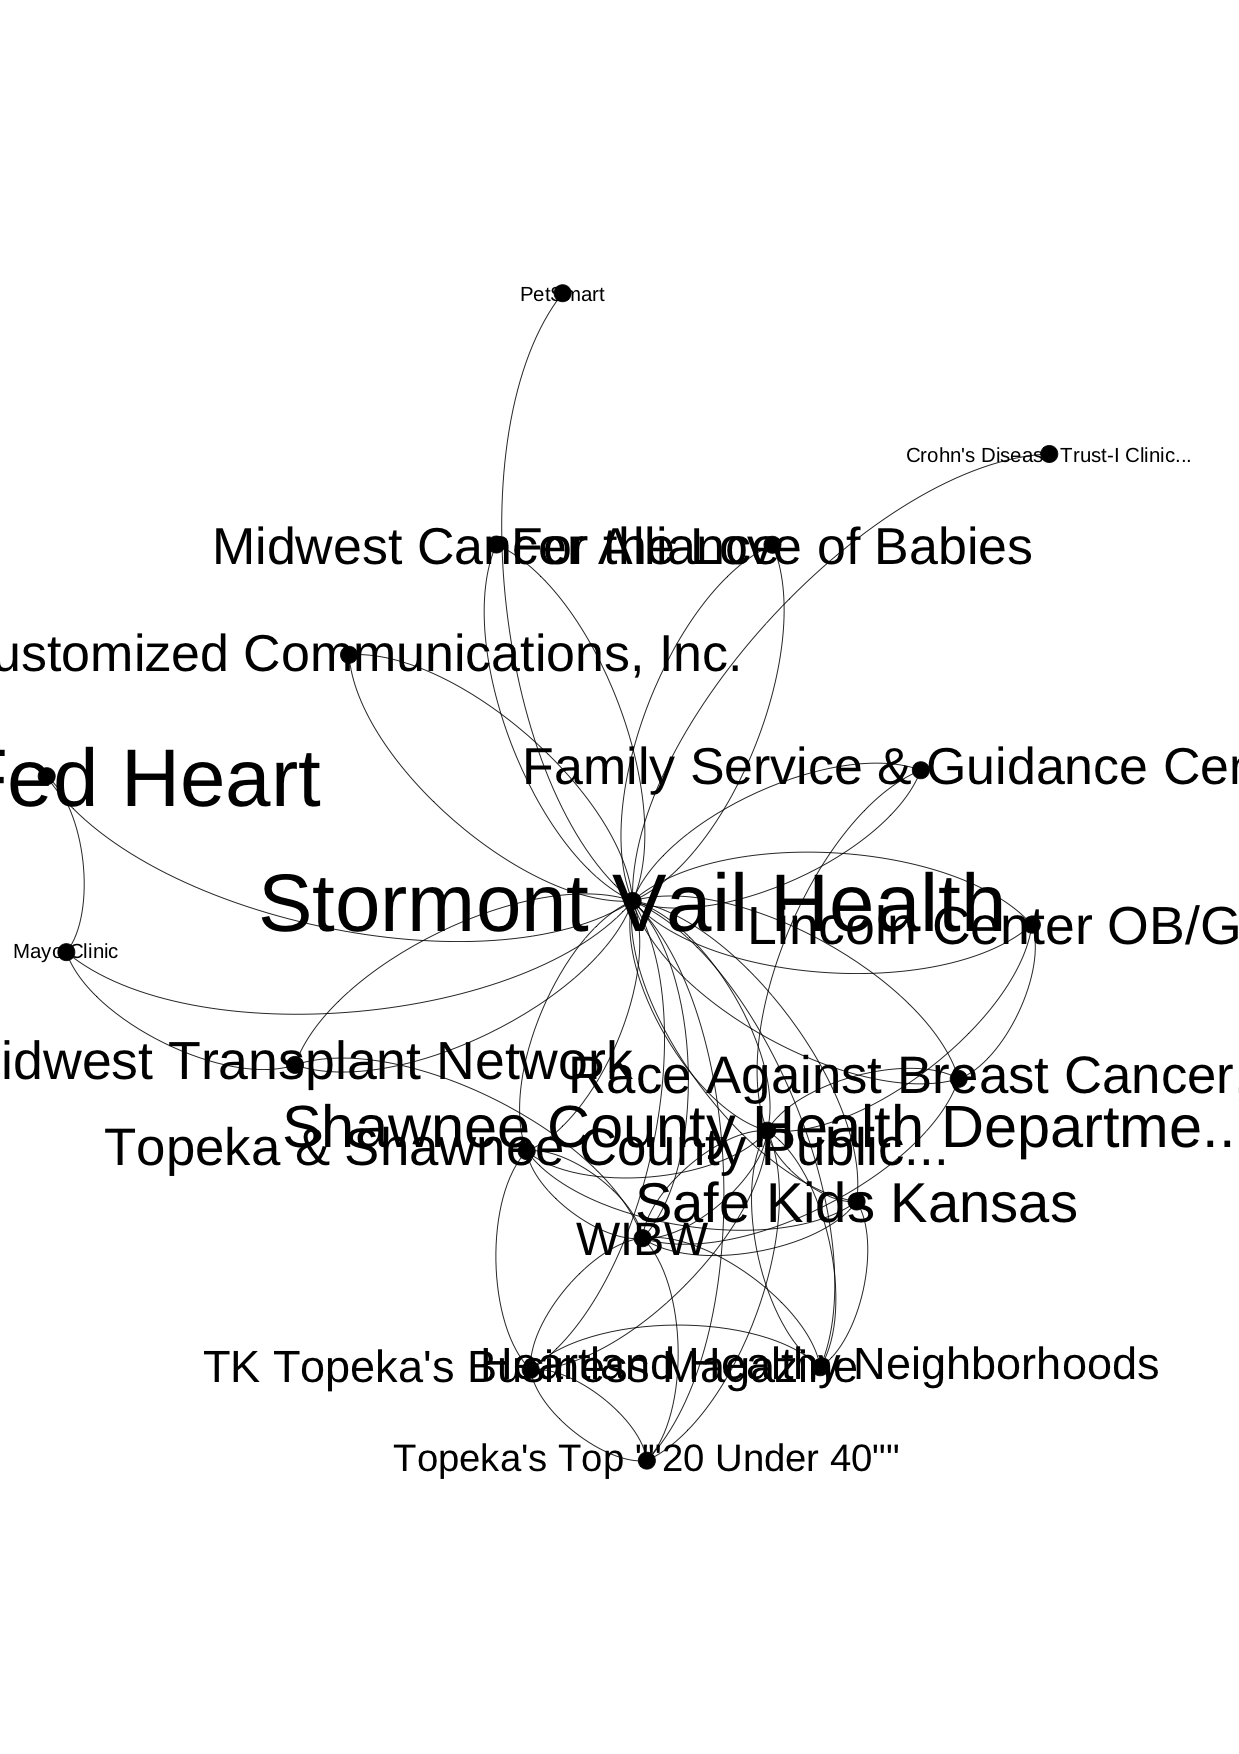

In [30]:
from IPython.display import Image
Image("data/facebook/sv.png")

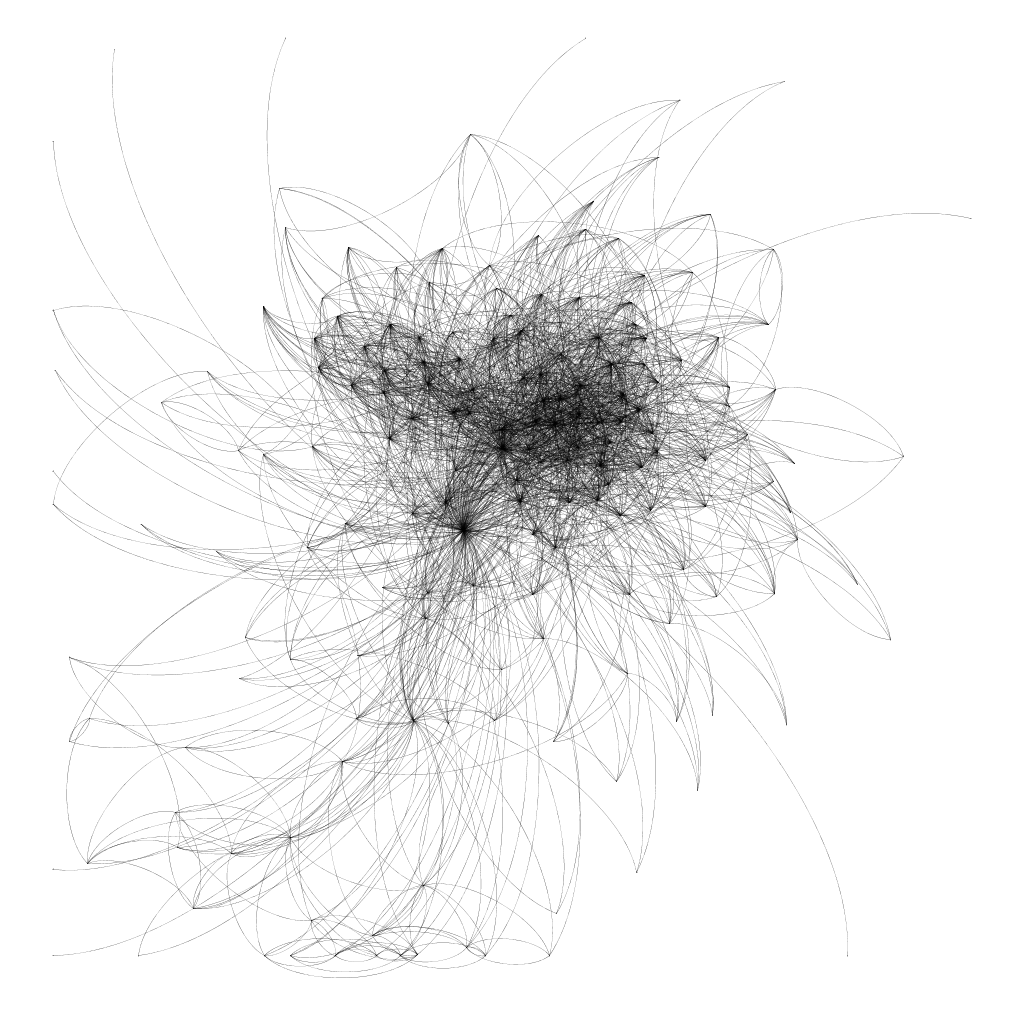

In [31]:
from IPython.display import Image
Image("data/facebook/sf.png")

# Content Analytics (Text Mining) Facebook Data - Gathered using Facepager to csv:

In [32]:
svtexts = []
svr = csv.reader(open('data/facebook/StormontVailHealth_facebook_statuses.csv', 'rb'))
next(svr, None)   #skipping column headers

for i in svr:
    svtexts.append(i[1])   #secondcolumn

sftexts = []
sfr = csv.reader(open('data/facebook/SF_facebook_statuses.csv', 'rb'))
next(sfr, None)   #skipping column headers

for i in sfr:
    sftexts.append(i[9])   #secondcolumn

print sv
print len(svtexts)
print sf
print len(sftexts)

Stormont:
590
St. Francis:
27


### Text Preprocessing and Data Cleaning:

In [33]:
#Stormont

#additional stopwords
more_stopwords = set(('stormont', 'vail', 'health', 'cotton', 'neil', 'saint', 'francis'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords

# Remove useless numbers and alphanumerical words
svtexts = [re.sub("[^a-zA-Z]+", " ", text) for text in svtexts]

# tokenizea
svtexts = [[word for word in text.lower().split() ] for text in svtexts]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
svtexts = [[lmtzr.lemmatize(word) for word in text ] for text in svtexts]

# remove common words 
svtexts = [[word for word in text if word not in extra_stoplist] for text in svtexts]

#remove short words
svtexts = [[ word for word in tokens if len(word) >= 3 ] for tokens in svtexts]

#St.Francis############################################

# Remove useless numbers and alphanumerical words
sftexts = [re.sub("[^a-zA-Z]+", " ", text) for text in sftexts]

# tokenizea
sftexts = [[word for word in text.lower().split() ] for text in sftexts]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
sftexts = [[lmtzr.lemmatize(word) for word in text ] for text in sftexts]

# remove common words 
sftexts = [[word for word in text if word not in extra_stoplist] for text in sftexts]

#remove short words
sftexts = [[ word for word in tokens if len(word) >= 3 ] for tokens in sftexts]

In [34]:
print sv
print len(svtexts)
print sf
print len(sftexts)

Stormont:
590
St. Francis:
27


In [35]:
print sv
print svtexts[5]
print sf
print sftexts[5]

Stormont:
['lola', 'stattelman', 'began', 'noticing', u'change', 'memory', u'year', 'ago', 'doctor', 'recommended', 'sign', 'free', 'memory', 'screening', 'helped', 'diagnose', 'beginning', u'stage', 'alzheimer', 'disease', 'since', 'stattelman', 'participated', 'alzheimer', 'research', 'clinical', 'research', 'center', u'hope', 'make', 'difference', 'future', u'generation']
St. Francis:
['happy', 'nationalhealthcarevolunteerweek', 'truly', 'believe', u'volunteer', 'university', u'kansa', 'system', 'campus', 'lifeblood', 'mission', 'serve', 'enriching', 'meaningful', 'capacity', 'healing', 'generosity', 'give', 'time', 'talent', 'make', u'patient', u'visitor', 'feel', 'warm', 'welcoming', 'could', 'appreciative', 'interested', 'becoming', 'volunteer', 'front', 'door', 'nursing', u'floor', 'emergency', 'room', 'volunteer', u'opportunity', 'abundant', 'learn', 'please', 'visit', 'http', 'kutopeka', 'com', 'volunteer']


## Create dictionaries to do Topic Analysis:

In [36]:
## Create a dictionary representation of the documents.
svdictionary = Dictionary(svtexts)
svdictionary.save('data/facebook/fbsv.dict')  # store the dictionary, for future reference

sfdictionary = Dictionary(sftexts)
sfdictionary.save('data/facebook/fbsf.dict')  # store the dictionary, for future reference

print sv
print len(svdictionary)
print sf
print len(sfdictionary)

Stormont:
3253
St. Francis:
438


In [37]:
## Remove rare and common tokens.
# ignore words that appear in less than 2 documents or more than 40% documents (remove too frequent & infrequent words) - an optional step
svdictionary.filter_extremes(no_below=2, no_above=0.4) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
sfdictionary.filter_extremes(no_below=2, no_above=0.4) 

print sv
print len(svdictionary)
print sf
print len(sfdictionary)

Stormont:
1683
St. Francis:
95


In [38]:
svcorpus = [svdictionary.doc2bow(text) for text in svtexts]  # convert words to vetors or integers
corpora.MmCorpus.serialize('data/facebook/fbsv.mm', svcorpus)  # store to disk, for later use  # store to disk, for later use

sfcorpus = [sfdictionary.doc2bow(text) for text in sftexts]  # convert words to vetors or integers
corpora.MmCorpus.serialize('data/facebook/fbsf.mm', sfcorpus)  # store to disk, for later use  # store to disk, for later use

In [39]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
svgoodLdaModel = ldamodel.LdaModel(svcorpus, id2word=svdictionary, num_topics=10, passes=50, eval_every = 1)

numpy.random.seed(1) # setting random seed to get the same results each time. 
sfgoodLdaModel = ldamodel.LdaModel(sfcorpus, id2word=sfdictionary, num_topics=10, passes=50, eval_every = 1)

In [40]:
svgoodcm = CoherenceModel(model=svgoodLdaModel, corpus=svcorpus, dictionary=svdictionary, coherence='u_mass')
sfgoodcm = CoherenceModel(model=sfgoodLdaModel, corpus=sfcorpus, dictionary=sfdictionary, coherence='u_mass')
print sv
print svgoodcm.get_coherence()
print sf
print sfgoodcm.get_coherence()

Stormont:
-6.170546185529648
St. Francis:
-10.69046087082787


In [41]:
# Prints the topics.
print sv
for top in svgoodLdaModel.show_topics(num_topics=10):
  print top
print

print sf
for top in sfgoodLdaModel.show_topics(num_topics=10):
  print top
print

Stormont:
(0, u'0.018*"baby" + 0.017*"today" + 0.011*"foundation" + 0.011*"make" + 0.011*"senior" + 0.010*"topeka" + 0.010*"kansa" + 0.010*"good" + 0.009*"welcome" + 0.009*"healthwise"')
(1, u'0.014*"http" + 0.014*"baby" + 0.013*"event" + 0.012*"flu" + 0.011*"available" + 0.011*"shot" + 0.010*"topeka" + 0.009*"bit" + 0.009*"cancer" + 0.009*"family"')
(2, u'0.030*"heart" + 0.021*"care" + 0.011*"disease" + 0.010*"wellpower" + 0.009*"risk" + 0.008*"get" + 0.008*"family" + 0.008*"tip" + 0.008*"diabetes" + 0.008*"holiday"')
(3, u'0.022*"topeka" + 0.018*"heart" + 0.014*"cancer" + 0.013*"big" + 0.013*"little" + 0.013*"help" + 0.012*"tournament" + 0.012*"golf" + 0.010*"patient" + 0.010*"pediatric"')
(4, u'0.030*"school" + 0.023*"high" + 0.018*"usd" + 0.016*"healthwise" + 0.011*"nurse" + 0.010*"channel" + 0.010*"family" + 0.009*"wibw" + 0.009*"height" + 0.009*"recent"')
(5, u'0.020*"mall" + 0.017*"check" + 0.016*"healthy" + 0.014*"join" + 0.013*"west" + 0.012*"ridge" + 0.011*"today" + 0.011*"st

In [42]:
print sv
# print words without probability
for i in range(0,10):
    svtopics = svgoodLdaModel.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in svtopics])
    
print sf
# print words without probability
for i in range(0,10):
    sftopics = sfgoodLdaModel.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in sftopics])

Stormont:
baby, today, foundation, make, senior, topeka, kansa, good, welcome, healthwise
http, baby, event, flu, available, shot, topeka, bit, cancer, family
heart, care, disease, wellpower, risk, get, family, tip, diabetes, holiday
topeka, heart, cancer, big, little, help, tournament, golf, patient, pediatric
school, high, usd, healthwise, nurse, channel, family, wibw, height, recent
mall, check, healthy, join, west, ridge, today, step, visit, walk
care, nurse, thank, patient, volunteer, week, day, family, provide, work
patient, care, award, congratulation, nursing, excellence, year, volunteer, center, clinic
video, help, week, life, two, like, team, staff, part, karaoke
free, clinical, register, volunteer, research, kansa, center, athletic, participant, run
St. Francis:
diabetes, risk, defeatdiabetesmonth, april, active, time, start, help, staying, prevented
healthy, heart, away, feel, much, time, remember, long, hour, nationalnutritionmonth
importance, awareness, www, one, http, sc

In [43]:
svlda_corpus = svgoodLdaModel[svcorpus]

print sv
svresults = []
for i in svlda_corpus:
    print i
    svresults.append(i)
print 

sflda_corpus = sfgoodLdaModel[sfcorpus]

print sf
sfresults = []
for i in sflda_corpus:
    print i
    sfresults.append(i)
print 

Stormont:
[(1, 0.49268764), (9, 0.48953104)]
[(0, 0.16974322), (6, 0.4966853), (7, 0.29467642)]
[(1, 0.19740789), (2, 0.57657415), (8, 0.1926797)]
[(5, 0.5833658), (9, 0.39885357)]
[(8, 0.98124725)]
[(9, 0.9689617)]
[(8, 0.9689631)]
[(9, 0.9774958)]
[(6, 0.17098288), (7, 0.8158999)]
[(0, 0.16728483), (4, 0.25318357), (7, 0.5646351)]
[(1, 0.327559), (3, 0.057356693), (4, 0.07926756), (5, 0.15842938), (8, 0.13868622), (9, 0.2344446)]
[(0, 0.45383102), (4, 0.1717966), (8, 0.35315678)]
[(1, 0.36550963), (2, 0.6037139)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(0, 0.5518475), (2, 0.17778666), (7, 0.25194064)]
[(2, 0.96785057)]
[(4, 0.4370649), (5, 0.51847786)]
[(1, 0.62299657), (4, 0.35033178)]
[(0, 0.48135725), (1, 0.014286172), (2

[(6, 0.08670541), (7, 0.36258012), (9, 0.5095333)]
[(0, 0.9727254)]
[(4, 0.06498152), (6, 0.4379017), (7, 0.49151567)]
[(4, 0.986762)]
[(2, 0.9571355)]
[(0, 0.56911963), (1, 0.01000134), (2, 0.010001005), (3, 0.010000387), (4, 0.35087427), (5, 0.010000289), (6, 0.010000547), (7, 0.010000246), (8, 0.010001612), (9, 0.010000633)]
[(4, 0.97187066)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(4, 0.35268942), (5, 0.23235558), (7, 0.35130227)]
[(5, 0.9876702)]
[(1, 0.97749823)]
[(2, 0.9526259)]
[(4, 0.9666654)]
[(3, 0.19552985), (6, 0.29789963), (8, 0.49028698)]
[(8, 0.98676056)]
[(0, 0.6731557), (3, 0.30017173)]
[(2, 0.93395025), (8, 0.051762216)]
[(0, 0.7859234), (1, 0.051981248), (2, 0.06557412), (6, 0.0811336)]
[(0, 0.26092032), (2, 0.692011)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(0, 0.0200012), (1, 0.020001862), (2, 0.8199768), (3, 0.020001864), (4, 0.020002108), (

[(1, 0.97272503)]
[(1, 0.97096527)]
[(2, 0.35330322), (5, 0.6170627)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(9, 0.9639917)]
[(7, 0.9735279)]
[(6, 0.2904441), (7, 0.6885007)]
[(4, 0.6820705), (6, 0.30090657)]
[(1, 0.22697958), (6, 0.439974), (7, 0.31782693)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(9, 0.98162866)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(3, 0.68470025), (6, 0.26823315)]
[(7, 0.97352636)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(7, 0.96999776)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.1), (7, 0.1), (8, 0.1), (9, 0.1)]
[(2, 0.9823508)]
[(0, 0.1), (1, 0.1), (2, 0.1), (3, 0.1), (4, 0.1), (5, 0.1), (6, 0.

In [44]:
# finding highest value from each row
print sv
svtoptopic = [max(collection, key=lambda x: x[1])[0] for collection in svresults]
print svtoptopic

print sf
sftoptopic = [max(collection, key=lambda x: x[1])[0] for collection in sfresults]
print sftoptopic

Stormont:
[1, 6, 2, 5, 8, 9, 8, 9, 7, 7, 1, 0, 2, 0, 0, 0, 0, 2, 5, 1, 0, 2, 7, 0, 7, 6, 2, 0, 0, 8, 5, 0, 2, 2, 0, 0, 0, 3, 5, 0, 7, 8, 3, 0, 0, 7, 0, 0, 2, 1, 2, 7, 0, 7, 5, 2, 9, 0, 8, 2, 0, 7, 7, 7, 2, 4, 2, 2, 5, 2, 7, 2, 5, 8, 6, 8, 7, 5, 0, 2, 3, 1, 2, 0, 7, 0, 8, 2, 2, 7, 2, 0, 5, 5, 2, 2, 1, 7, 2, 2, 2, 9, 0, 9, 4, 7, 5, 2, 7, 1, 0, 2, 9, 2, 5, 1, 4, 5, 0, 5, 5, 5, 2, 9, 2, 8, 0, 9, 2, 7, 5, 2, 5, 0, 1, 5, 0, 0, 4, 4, 9, 7, 2, 2, 3, 0, 0, 0, 7, 2, 0, 7, 7, 5, 7, 4, 8, 4, 5, 0, 1, 1, 3, 0, 7, 7, 4, 1, 0, 3, 6, 2, 4, 8, 2, 0, 8, 2, 0, 4, 5, 7, 0, 2, 0, 6, 0, 8, 4, 0, 7, 2, 2, 3, 0, 2, 0, 4, 9, 0, 7, 4, 2, 0, 4, 0, 4, 5, 1, 2, 4, 8, 8, 0, 2, 0, 2, 0, 2, 4, 5, 2, 2, 1, 0, 6, 4, 1, 2, 7, 2, 3, 0, 0, 2, 1, 2, 0, 4, 5, 6, 1, 9, 0, 7, 6, 4, 4, 9, 2, 1, 7, 5, 5, 5, 1, 6, 5, 0, 1, 1, 1, 9, 0, 0, 7, 9, 6, 5, 1, 8, 0, 0, 5, 6, 9, 9, 8, 1, 7, 9, 0, 3, 1, 2, 0, 1, 6, 6, 7, 0, 0, 6, 1, 9, 7, 1, 9, 3, 9, 2, 1, 6, 5, 0, 4, 7, 8, 1, 1, 7, 0, 9, 7, 0, 1, 0, 0, 7, 0, 0, 6, 1, 5, 5, 1, 8, 8, 2, 0,

In [45]:
print sv
svdocuments = svtexts

svtoptopic = pd.DataFrame(svtoptopic)
svdocuments = pd.DataFrame(svdocuments)
svdocuments = svdocuments.rename(columns = {0: 'documents'})
svsummary = svdocuments.join(svtoptopic)
svsummary.head()

Stormont:


,documents,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,0
0,nurse,frontlines,patient,road,recovery,ass,treat,monitor,advocate,counsel,...,None,None,None,None,None,None,None,None,None,1
1,brenner,dixon,general,surgeon,excited,recent,advance,general,surgery,emphasis,...,None,None,None,None,None,None,None,None,None,6
2,feel,like,life,bit,cluttered,tom,baker,director,spiritual,care,...,None,None,None,None,None,None,None,None,None,2
3,next,safe,kid,shawnee,county,car,seat,check,event,held,...,None,None,None,None,None,None,None,None,None,5
4,time,child,life,age,filled,many,physical,emotional,change,change,...,None,None,None,None,None,None,None,None,None,8


In [46]:
print sf
sfdocuments = sftexts

sftoptopic = pd.DataFrame(sftoptopic)
sfdocuments = pd.DataFrame(sfdocuments)
sfdocuments = sfdocuments.rename(columns = {0: 'documents'})
sfsummary = sfdocuments.join(sftoptopic)
sfsummary.head()

St. Francis:


,documents,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,0
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0
1,medical,laboratory,professional,week,concludes,would,like,recognize,lab,team,...,None,None,None,None,None,None,None,None,None,9
2,treat,cause,show,appreciation,employee,patient,university,kansa,campus,treated,...,None,None,None,None,None,None,None,None,None,8
3,yesterday,held,free,hand,cpr,course,help,show,community,save,...,None,None,None,None,None,None,None,None,None,6
4,family,know,perform,hand,cpr,wibw,visited,hospital,morning,learn,...,None,None,None,None,None,None,None,None,None,6


In [47]:
print sv
svsummary.groupby(0).count()

Stormont:


,documents,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,,,,,,,,,,,,,,,,,,,,,
0,73,72,72,71,69,69,69,66,62,61,...,0,0,0,0,0,0,0,0,0,0
1,54,54,54,54,54,54,54,54,54,51,...,0,0,0,0,0,0,0,0,0,0
2,72,71,71,71,70,70,69,69,68,67,...,0,0,0,0,0,0,0,0,0,0
3,29,29,29,29,29,29,29,29,28,28,...,0,0,0,0,0,0,0,0,0,0
4,31,31,31,31,31,31,30,30,30,30,...,0,0,0,0,0,0,0,0,0,0
5,53,53,53,53,53,51,51,47,43,42,...,0,0,0,0,0,0,0,0,0,0
6,48,48,48,48,48,48,48,48,48,48,...,0,0,0,0,0,0,0,0,0,0
7,74,74,74,74,74,74,74,74,72,71,...,1,1,1,1,1,1,1,0,0,0
8,45,45,45,45,45,45,44,43,43,43,...,0,0,0,0,0,0,0,0,0,0


In [48]:

print sf
sfsummary.groupby(0).count()

St. Francis:


,documents,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
3,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
7,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
print sv
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(svgoodLdaModel, svcorpus, svdictionary)

Stormont:


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      14.945231        1       1  0.185405 -0.009715
2      11.845956        1       2  0.041971  0.079483
0      11.600155        1       3 -0.153950  0.033046
1      11.436570        1       4 -0.055188  0.029569
6      10.572916        1       5  0.156022 -0.034448
8       9.972649        1       6 -0.043247 -0.258890
9       9.249437        1       7 -0.114229 -0.019568
5       7.855311        1       8 -0.146907  0.077222
4       6.902299        1       9  0.081393  0.105271
3       5.619477        1      10  0.048730 -0.001971, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
1316  Default   55.000000        video   55.000000  30.0000  30.0000
591   Default  170.000000         care  170.000000  29.0000  29.0000
513   Default   86.000000        heart   86.000000  28.0000  28.0000
64    Default   60.000000        award   60.000000  27.0000  27.0000
304   Default  144.000000      patient  144.000000  26.0000  26.0000
18    Default   43.000000       school   43.000000  25.0000  25.0000
1385  Default   62.000000       topeka   62.000000  24.0000  24.0000
901   Default   82.000000        nurse   82.000000  23.0000  23.0000
1366  Default   63.000000         baby   63.000000  22.0000  22.0000
146   Default   39.000000         free   39.000000  21.0000  21.0000
935   Default   23.000000         mall   23.000000  20.0000  20.0000
1376  Default   36.000000         high   36.000000  19.0000  19.0000
724   Default   56.000000       cancer   56.000000  18.0000  18.0000
1024  Default   44.000000   healthwise   44.000000  17.0000  17.0000
552   Default   55.000000        thank   55.000000  16.0000  16.0000
1227  Default   20.000000          usd   20.000000  15.0000  15.0000
482   Default   32.000000      healthy   32.000000  14.0000  14.0000
1546  Default   78.000000    volunteer   78.000000  13.0000  13.0000
453   Default   35.000000   excellence   35.000000  12.0000  12.0000
963   Default   86.000000         help   86.000000  11.0000  11.0000
407   Default   45.000000        check   45.000000  10.0000  10.0000
932   Default   19.000000      karaoke   19.000000   9.0000   9.0000
19    Default   35.000000        prize   35.000000   8.0000   8.0000
40    Default   31.000000  celebration   31.000000   7.0000   7.0000
685   Default   45.000000          get   45.000000   6.0000   6.0000
1308  Default   43.000000        kansa   43.000000   5.0000   5.0000
922   Default   36.000000          two   36.000000   4.0000   4.0000
918   Default   81.000000       family   81.000000   3.0000   3.0000
819   Default   18.000000     favorite   18.000000   2.0000   2.0000
1208  Default   36.000000         like   36.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
487   Topic10    8.108104    pediatric   19.425599   2.0052  -4.6307
490   Topic10    5.918601         love   13.270186   2.0715  -4.9455
1385  Topic10   17.893399       topeka   62.836992   1.6228  -3.8392
198   Topic10    3.478969      regular    6.991232   2.1810  -5.4768
376   Topic10    3.156708     facility    6.118376   2.2172  -5.5741
1455  Topic10    6.131565         able   17.631645   1.8227  -4.9101
718   Topic10    5.890978         many   17.570851   1.7861  -4.9502
1135  Topic10    4.933224   throughout   13.229594   1.8925  -5.1276
495   Topic10    5.250547      working   15.033453   1.8270  -5.0653
513   Topic10   14.746560        heart   86.040171   1.1151  -4.0326
724   Topic10   11.256092       cancer   56.363707   1.2680  -4.3027
1485  Topic10    6.090458     employee   23.098761   1.5459  -4.9169
1363  Topic10    2.623680      started    5.288564   2.1780  -5.7590
991   Topic10    2.565909       mental    5.252744   2.1625  -5.7813
963   Topic10   10.546397         help   86.370292   0.7761  -4.36

In [50]:
print sf
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(sfgoodLdaModel, sfcorpus, sfdictionary)

St. Francis:


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      19.916782        1       1  0.123664  0.116022
7      16.991249        1       2  0.102272  0.048928
6      15.964254        1       3  0.090523 -0.157896
2      13.688127        1       4 -0.056480  0.154509
9       8.036506        1       5  0.082306 -0.057108
3       7.697863        1       6 -0.113934 -0.133835
0       6.779380        1       7 -0.186613  0.039201
1       5.094349        1       8 -0.112560 -0.007622
8       4.051606        1       9  0.046423 -0.016736
5       1.779883        1      10  0.024398  0.014536, topic_info=     Category      Freq                    Term     Total  loglift  logprob
term                                                                       
5     Default  6.000000                   thank  6.000000  30.0000  30.0000
73    Default  6.000000                  doctor  6.000000  29.0000  29.0000
89    Default  4.000000                diabetes  4.000000  28.0000  28.0000
7     Default  3.000000                employee  3.000000  27.0000  27.0000
0     Default  5.000000                    help  5.000000  26.0000  26.0000
9     Default  4.000000                    risk  4.000000  25.0000  25.0000
25    Default  2.000000              doctorsday  2.000000  24.0000  24.0000
31    Default  6.000000                 patient  6.000000  23.0000  23.0000
41    Default  4.000000                 healthy  4.000000  22.0000  22.0000
61    Default  2.000000                   treat  2.000000  21.0000  21.0000
86    Default  4.000000                    hand  4.000000  20.0000  20.0000
68    Default  3.000000                    work  3.000000  19.0000  19.0000
39    Default  4.000000                    care  4.000000  18.0000  18.0000
35    Default  3.000000                    free  3.000000  17.0000  17.0000
94    Default  4.000000                     cpr  4.000000  16.0000  16.0000
16    Default  6.000000              university  6.000000  15.0000  15.0000
76    Default  4.000000                  campus  4.000000  14.0000  14.0000
53    Default  4.000000                   would  4.000000  13.0000  13.0000
93    Default  3.000000                    time  3.000000  12.0000  12.0000
65    Default  2.000000     defeatdiabetesmonth  2.000000  11.0000  11.0000
13    Default  2.000000                   every  2.000000  10.0000  10.0000
72    Default  5.000000                   share  5.000000   9.0000   9.0000
17    Default  6.000000                   kansa  6.000000   8.0000   8.0000
24    Default  2.000000                    hard  2.000000   7.0000   7.0000
1     Default  2.000000                    show  2.000000   6.0000   6.0000
82    Default  2.000000                 staying  2.000000   5.0000   5.0000
34    Default  2.000000                   night  2.000000   4.0000   4.0000
88    Default  2.000000  nationalnutritionmonth  2.000000   3.0000   3.0000
27    Default  2.000000                    away  2.000000   2.0000   2.0000
6     Default  3.000000               screening  3.000000   1.0000   1.0000
...       ...       ...                     ...       ...      ...      ...
80    Topic10  0.039948                     tip  2.226354   0.0081  -4.9053
37    Topic10  0.039948                  active  2.226814   0.0079  -4.9053
91    Topic10  0.039948                 medical  2.238986   0.0024  -4.9053
11    Topic10  0.039948                possible  2.238986   0.0024  -4.9053
85    Topic10  0.039948               yesterday  2.247882  -0.0015  -4.9053
50    Topic10  0.039948               community  2.247882  -0.0015  -4.9053
52    Topic10  0.039948                 quality  2.257384  -0.0058  -4.9053
2     Topic10  0.039948                 mission  2.257384  -0.0058  -4.9053
44    Topic10  0.039948                  topeka  2.266890  -0.0100  -4.9053
84    Topic10  0.039948        gastroenterology  2.335841  -0.0399  -4.9053
8     Topic10  0.039949               awa

## Additional Word Frequency Analysis

In [51]:
# text preprocessing
svtokens = str(svtexts)

#lowecases
svtokens = svtokens.lower()

# Remove useless numbers and alphanumerical words
svtokens = re.sub("[^a-zA-Z0-9]", " ", svtokens)

#tokenization or word split
svtokens = word_tokenize(svtokens)

#Remove stopwords
svtokens = [word for word in svtokens if word not in extra_stoplist]

#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
svtokens = ([wordnet_lemmatizer.lemmatize(w) for w in svtokens])

#remove short words
svtokens = [ word for word in svtokens if len(word) > 3 ]

###########################

# text preprocessing
sftokens = str(sftexts)

#lowecases
sftokens = sftokens.lower()

# Remove useless numbers and alphanumerical words
sftokens = re.sub("[^a-zA-Z0-9]", " ", sftokens)

#tokenization or word split
sftokens = word_tokenize(sftokens)

#Remove stopwords
sftokens = [word for word in sftokens if word not in extra_stoplist]

#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
sftokens = ([wordnet_lemmatizer.lemmatize(w) for w in sftokens])

#remove short words
sftokens = [ word for word in sftokens if len(word) > 3 ]

In [52]:
# Word frequency analysis
print sv
svfdist = nltk.FreqDist(svtokens)
print svfdist

print sf
sffdist = nltk.FreqDist(sftokens)
print sffdist

Stormont:
<FreqDist with 3074 samples and 15314 outcomes>
St. Francis:
<FreqDist with 408 samples and 632 outcomes>


In [53]:
#popular words from each dataset
print sv
svcommon_fin = svfdist.most_common(20)
print svcommon_fin

print sf
sfcommon_fin = sffdist.most_common(20)
print sfcommon_fin

Stormont:
[('care', 186), ('patient', 158), ('week', 107), ('today', 101), ('center', 101), ('heart', 95), ('help', 95), ('nurse', 90), ('family', 90), ('volunteer', 86), ('join', 81), ('team', 80), ('http', 72), ('topeka', 70), ('baby', 69), ('clinic', 69), ('congratulation', 68), ('year', 66), ('award', 65), ('make', 62)]
St. Francis:
[('thank', 8), ('kansa', 7), ('university', 7), ('doctor', 7), ('patient', 7), ('share', 6), ('help', 6), ('cancer', 6), ('risk', 5), ('healthy', 5), ('would', 5), ('care', 5), ('http', 5), ('hand', 5), ('diabetes', 5), ('campus', 5), ('hospital', 4), ('visit', 4), ('work', 4), ('learn', 4)]


Stormont:


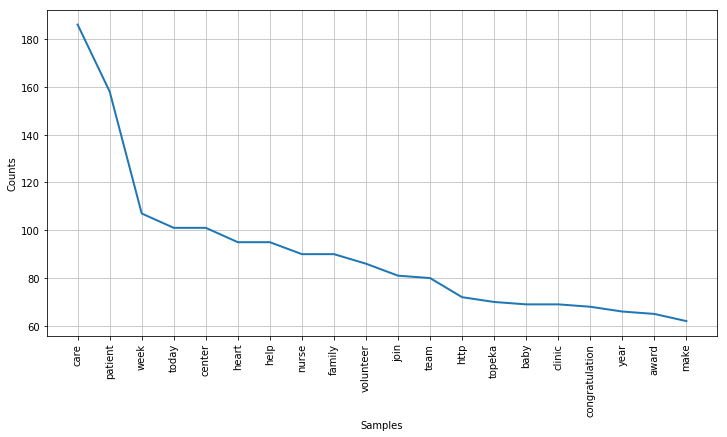

St. Francis:


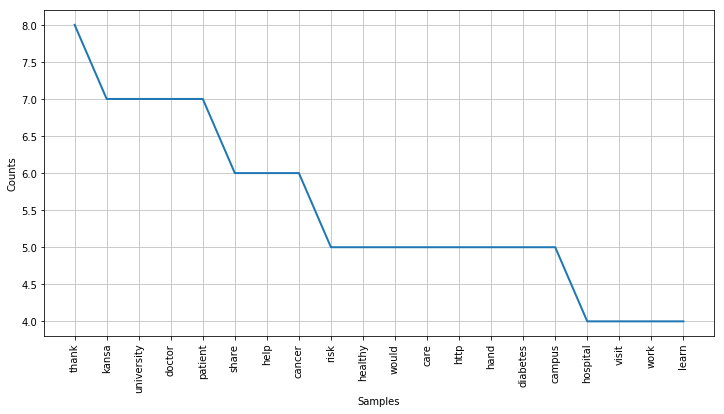

In [54]:
# plot word frequency
print sv
plt.figure(figsize=(12,6))
svfdist.plot(20)

print sf
plt.figure(figsize=(12,6))
sffdist.plot(20)

# TWITTER Data Collection:

In [55]:
# Adapted from https://gist.github.com/yanofsky/5436496#file-tweet_dumper-py-L36
#http://stackoverflow.com/questions/27351207/gracefully-handle-errors-and-exceptions-for-user-timeline-method-in-tweepy

import tweepy
import csv
import time

#Variables that contains the user credentials to access Twitter API
consumer_key = 'ncmeZQbgNeW2MXcBZ0i4SFVzA'
consumer_secret = 'QQmsxatDGiQFwdS1WJC50dBOC9cU8Sd50ofsctdgt7tveCX1yC'
access_token = '1228505557-B7MnA1AHnbnRMcQd7jUKG7dbmKG14RhTzX66f5j'
access_token_secret = '6HYVURgAE7pBVp0cC4j03Gg6u3Y7rwop8XMgeIfn9OhKu'

#Twitter only allows access to a users most recent 3240 tweets with this method

#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

openfile = open("data/twitter/svname.csv", "rb")
r = csv.reader(openfile)

writefile=open("data/twitter/sample_tweets-sv.csv", "wb")
w=csv.writer(writefile)
svtw = "@stormontvail"

#counter = 0

for i in r:
    #initialize a list to hold all the tweepy Tweets
    svalltweets = []
    print i[0]

    try:
        new_tweets = api.user_timeline(screen_name = svtw, count=200, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    except:
        pass
    #save most recent tweets
    svalltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    try:
        oldest = svalltweets[-1].id - 1
    except:
        pass

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print "getting tweets before %s" % (oldest)

        #all subsiquent requests use the max_id param to prevent duplicates
        try:
            new_tweets = api.user_timeline(screen_name = i[0],count=200,max_id=oldest, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        except:
            pass
        #save most recent tweets
        svalltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = svalltweets[-1].id - 1

        print "...%s tweets downloaded so far" % (len(svalltweets))

    for tweet in svalltweets:
        w.writerow([i[0], tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")])

writefile.close()

@stormontvail
getting tweets before 955877512378122239
...400 tweets downloaded so far
getting tweets before 918868938754211840
...600 tweets downloaded so far
getting tweets before 865593243056001023
...800 tweets downloaded so far
getting tweets before 817747655673647104
...1000 tweets downloaded so far
getting tweets before 766724379040288767
...1200 tweets downloaded so far
getting tweets before 653667461288603647
...1399 tweets downloaded so far
getting tweets before 585131636250939392
...1599 tweets downloaded so far
getting tweets before 415248304453464063
...1658 tweets downloaded so far
getting tweets before 360425834923819007
...1658 tweets downloaded so far


In [56]:
openfile = open("data/twitter/sfname.csv", "rb")
r = csv.reader(openfile)

writefile=open("data/twitter/sample_tweets-sf.csv", "wb")
w=csv.writer(writefile)
sftw = "@stfrancistopeka"

#counter = 0

for i in r:
    #initialize a list to hold all the tweepy Tweets
    sfalltweets = []
    print i[0]

    try:
        new_tweets = api.user_timeline(screen_name = sftw, count=200, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    except:
        pass
    #save most recent tweets
    sfalltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    try:
        oldest = sfalltweets[-1].id - 1
    except:
        pass

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print "getting tweets before %s" % (oldest)

        #all subsiquent requests use the max_id param to prevent duplicates
        try:
            new_tweets = api.user_timeline(screen_name = i[0],count=200,max_id=oldest, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        except:
            pass
        #save most recent tweets
        sfalltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = sfalltweets[-1].id - 1

        print "...%s tweets downloaded so far" % (len(sfalltweets))

    for tweet in sfalltweets:
        w.writerow([i[0], tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")])

writefile.close()

@stfrancistopeka
getting tweets before 321973716508610559
...400 tweets downloaded so far
getting tweets before 241171694675435519
...600 tweets downloaded so far
getting tweets before 142340802935398401
...683 tweets downloaded so far
getting tweets before 101732723978276863
...683 tweets downloaded so far


###### Stormont 1658 Tweets Collected
###### St. Francis 683 Tweets Collected

In [57]:
from pandas import Series, DataFrame
import pandas as pd
from itertools import groupby

SVCSV1 = pd.read_csv('data/twitter/sample_tweets-sv.csv', delimiter=",", header=None, names = ['Hospital', 'TweetID', 'TimeStamp', 'Tweet'])#Skip rows if required, skiprows=2)

svframes = [SVCSV1]
print sv
svresult = pd.concat(svframes, keys=['Hospital', 'TweetID', 'TimeStamp', 'Tweet'])
svresult.to_csv("data/twitter/sv_data.csv", encoding="utf-8")
svresult

Stormont:


Hospital             TweetID            TimeStamp  \
Hospital 0     @stormontvail  991358364176142336  2018-05-01 16:47:07   
         1     @stormontvail  990645145442844672  2018-04-29 17:33:02   
         2     @stormontvail  990274544647753729  2018-04-28 17:00:24   
         3     @stormontvail  989912128944566272  2018-04-27 17:00:17   
         4     @stormontvail  989911704183230470  2018-04-27 16:58:36   
         5     @stormontvail  989863189834690560  2018-04-27 13:45:49   
         6     @stormontvail  989861880595271682  2018-04-27 13:40:37   
         7     @stormontvail  989558237019230212  2018-04-26 17:34:03   
         8     @stormontvail  989527121998557185  2018-04-26 15:30:25   
         9     @stormontvail  989175982673326081  2018-04-25 16:15:06   
         10    @stormontvail  988884966036525056  2018-04-24 20:58:43   
         11    @stormontvail  988825062877941761  2018-04-24 17:00:41   
         12    @stormontvail  988532225212739584  2018-04-23 21:37:03   
         13    @stormontvail  988532049639227392  2018-04-23 21:36:21   
         14    @stormontvail  988515175044071425  2018-04-23 20:29:18   
         15    @stormontvail  988447521381933056  2018-04-23 16:00:28   
         16    @stormontvail  988159595905519617  2018-04-22 20:56:21   
         17    @stormontvail  988100190476304385  2018-04-22 17:00:18   
         18    @stormontvail  987491806366633984  2018-04-21 00:42:48   
         19    @stormontvail  987449407481131008  2018-04-20 21:54:19   
         20    @stormontvail  987365026141908992  2018-04-20 16:19:01   
         21    @stormontvail  987360949093969920  2018-04-20 16:02:49   
         22    @stormontvail  987360153816240128  2018-04-20 15:59:39   
         23    @stormontvail  987073999967469570  2018-04-19 21:02:35   
         24    @stormontvail  986994084152782848  2018-04-19 15:45:01   
         25    @stormontvail  986725828837781504  2018-04-18 21:59:04   
         26    @stormontvail  986658618304024576  2018-04-18 17:32:00   
         27    @stormontvail  986611653608263680  2018-04-18 14:25:23   
         28    @stormontvail  986611281695203328  2018-04-18 14:23:54   
         29    @stormontvail  986609474008793088  2018-04-18 14:16:43   
...                      ...                 ...                  ...   
         1628  @stormontvail  382258551580016640  2013-09-23 21:41:55   
         1629  @stormontvail  381087194213261312  2013-09-20 16:07:22   
         1630  @stormontvail  381080860734537728  2013-09-20 15:42:12   
         1631  @stormontvail  380809634564816896  2013-09-19 21:44:26   
         1632  @stormontvail  380698020964474881  2013-09-19 14:20:55   
         1633  @stormontvail  380103587244036096  2013-09-17 22:58:51   
         1634  @stormontvail  380079000959606784  2013-09-17 21:21:10   
         1635  @stormontvail  380078690795003904  2013-09-17 21:19:56   
         1636  @stormontvail  378599164885483520  2013-09-13 19:20:49   
         1637  @stormontvail  377874809545580544  2013-09-11 19:22:29   
         1638  @stormontvail  377815116156526592  2013-09-11 15:25:17   
         1639  @stormontvail  377469246197862400  2013-09-10 16:30:55   
         1640  @stormontvail  377181856086896640  2013-09-09 21:28:56   
         1641  @stormontvail  376070118494973952  2013-09-06 19:51:17   
         1642  @stormontvail  375725765318692864  2013-09-05 21:02:57   
         1643  @stormontvail  375725256851607552  2013-09-05 21:00:56   
         1644  @stormontvail  375641895093141504  2013-09-05 15:29:41   
         1645  @stormontvail  373151070077599744  2013-08-29 18:32:02   
         1646  @stormontvail  372431391587565568  2013-08-27 18:52:17   
         1647  @stormontvail  370956685722279936  2013-08-23 17:12:20   
         1648  @stormontvail  370598236794679296  2013-08-22 17:27:59   
         1649  @stormontvail  370199811125166080  2013-08-21 15:04:47   
         1650  @stormontvail  370194721278537728  2013-08-21 14:44:34   
     

In [58]:
SFCSV1 = pd.read_csv('data/twitter/sample_tweets-sf.csv', delimiter=",", header=None, names = ['Hospital', 'TweetID', 'TimeStamp', 'Tweet'])#Skip rows if required, skiprows=2)

sfframes = [SFCSV1]
print sf
sfresult = pd.concat(sfframes, keys=['Hospital', 'TweetID', 'TimeStamp', 'Tweet'])
sfresult.to_csv("data/twitter/sf_data.csv", encoding="utf-8")
sfresult

St. Francis:


Hospital             TweetID            TimeStamp  \
Hospital 0    @stfrancistopeka  925734206751330304  2017-11-01 14:40:08   
         1    @stfrancistopeka  786221788380405761  2016-10-12 15:07:36   
         2    @stfrancistopeka  781291686643179520  2016-09-29 00:37:08   
         3    @stfrancistopeka  781239372112736257  2016-09-28 21:09:15   
         4    @stfrancistopeka  773296270186123264  2016-09-06 23:06:12   
         5    @stfrancistopeka  771403429239328768  2016-09-01 17:44:44   
         6    @stfrancistopeka  771403119167021056  2016-09-01 17:43:30   
         7    @stfrancistopeka  760307954201468928  2016-08-02 02:55:16   
         8    @stfrancistopeka  750335446945718273  2016-07-05 14:28:05   
         9    @stfrancistopeka  737743176019017728  2016-05-31 20:30:54   
         10   @stfrancistopeka  737742989229887488  2016-05-31 20:30:09   
         11   @stfrancistopeka  718501884814712833  2016-04-08 18:12:53   
         12   @stfrancistopeka  712298234824101889  2016-03-22 15:21:47   
         13   @stfrancistopeka  707278816398352384  2016-03-08 18:56:25   
         14   @stfrancistopeka  700729195698266114  2016-02-19 17:10:33   
         15   @stfrancistopeka  700705724981080064  2016-02-19 15:37:17   
         16   @stfrancistopeka  700036888074137600  2016-02-17 19:19:34   
         17   @stfrancistopeka  700029504677281793  2016-02-17 18:50:14   
         18   @stfrancistopeka  700028260143370242  2016-02-17 18:45:17   
         19   @stfrancistopeka  699290485840478209  2016-02-15 17:53:38   
         20   @stfrancistopeka  699265758551891968  2016-02-15 16:15:23   
         21   @stfrancistopeka  698185609001631744  2016-02-12 16:43:15   
         22   @stfrancistopeka  698162529587990528  2016-02-12 15:11:32   
         23   @stfrancistopeka  698153305822748672  2016-02-12 14:34:53   
         24   @stfrancistopeka  685165214937956352  2016-01-07 18:24:51   
         25   @stfrancistopeka  685165182738251776  2016-01-07 18:24:43   
         26   @stfrancistopeka  681511593218199552  2015-12-28 16:26:40   
         27   @stfrancistopeka  679371458259247104  2015-12-22 18:42:32   
         28   @stfrancistopeka  667708764082978817  2015-11-20 14:19:09   
         29   @stfrancistopeka  667708074333855744  2015-11-20 14:16:24   
...                        ...                 ...                  ...   
         653  @stfrancistopeka  107479128307023873  2011-08-27 15:46:35   
         654  @stfrancistopeka  107479006462492672  2011-08-27 15:46:06   
         655  @stfrancistopeka  107153158232489984  2011-08-26 18:11:18   
         656  @stfrancistopeka  106755504008736768  2011-08-25 15:51:10   
         657  @stfrancistopeka  106696454541803520  2011-08-25 11:56:31   
         658  @stfrancistopeka  106385559777312769  2011-08-24 15:21:08   
         659  @stfrancistopeka  106345962703818752  2011-08-24 12:43:47   
         660  @stfrancistopeka  106071050848186369  2011-08-23 18:31:23   
         661  @stfrancistopeka  105080306482155520  2011-08-21 00:54:32   
         662  @stfrancistopeka  103540702201397248  2011-08-16 18:56:41   
         663  @stfrancistopeka  103475026589790209  2011-08-16 14:35:43   
         664  @stfrancistopeka  103222695365324800  2011-08-15 21:53:03   
         665  @stfrancistopeka  103154300162801664  2011-08-15 17:21:16   
         666  @stfrancistopeka  103115907173318656  2011-08-15 14:48:42   
         667  @stfrancistopeka  102787135278555136  2011-08-14 17:02:17   
         668  @stfrancistopeka  102468222770622465  2011-08-13 19:55:02   
         669  @stfrancistopeka  102421665367080961  2011-08-13 16:50:02   
         670  @stfrancistopeka  102403569059237888  2011-08-13 15:38:08   
         671  @stfrancistopeka  102099248602030081  2011-08-12 19:28:52   
         672  @stfrancistopeka  102092236891754496  2011-08-12 19:01:00   
         673  @stfrancistopeka  102084721906950144  2011-08-12 18:31:09   
         674  @stfrancistopeka  102032373687918

In [59]:
#Removing Junk Columns in CSV
import csv
with open("data/twitter/sv_data.csv","rb") as svsource:
    svrdr= csv.reader( svsource )
    with open("data/twitter/sv_data2.csv","wb") as svresult:
        svwtr= csv.writer( svresult )
        for r in svrdr:
            svwtr.writerow( (r[4], r[5]) )
            
with open("data/twitter/sf_data.csv","rb") as sfsource:
    sfrdr= csv.reader( sfsource )
    with open("data/twitter/sf_data2.csv","wb") as sfresult:
        sfwtr= csv.writer( sfresult )
        for r in sfrdr:
            sfwtr.writerow( (r[4], r[5]) )

In [60]:
#READING DATA
# first column
svtweet = []

svopenfile = open('data/twitter/sv_data2.csv', 'rb')
svr = csv.reader(svopenfile)

for i in svr:
    svtweet.append(i[1])
    
svopenfile.close()

sftweet = []

sfopenfile = open('data/twitter/sf_data2.csv', 'rb')
sfr = csv.reader(sfopenfile)

for i in sfr:
    sftweet.append(i[1])
    
sfopenfile.close()

print sv
print svtweet[5]

print sf
print sftweet[5]

Stormont:
RT @randyschwarz: Panel of senior leaders from @mayoclinic @NorthBayHealth @tmcaznews @StormontVail addressing #healthcare  #reimbursement…
St. Francis:
@EffulgentGirl We are so sorry that happened! Here is the number for our patient advocacy team 785-295-8086.  They can help!


### Twitter Hashtag Analysis

In [61]:
# first extract all hashtags from tweets

import re

svhashtags = []
print sv
for tweet in svtweet:
    print re.findall(r"(?<=#)\w+", tweet)
    
sfhashtags = []
print sf
for tweet in sftweet:
    print re.findall(r"(?<=#)\w+", tweet)

Stormont:
[]
[]
[]
['skincancer']
[]
['healthcare', 'reimbursement']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['skincancer']
[]
[]
[]
['sodium']
[]
['calcium']
['AlzheimersDisease']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['volunteers']
[]
[]
[]
['skincancer']
['measles']
[]
['AlzheimersDisease']
[]
[]
['nurses']
[]
['HIV']
[]
[]
[]
[]
['cancer']
[]
['DonateLifeMonth']
[]
[]
[]
['Sto']
['BreastCancer', 'AlcoholAwarenessMonth']
['NationalWalkingDay']
[]
['runners']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['spring', 'allergies']
[]
[]
[]
[]
[]
[]
[]
['NationalPuppyDay']
['skday']
[]
['ColorectalCancer']
[]
['water', 'hydrate']
[]
[]
[]
[]
[]
[]
['CertifiedNursesDay']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['ColonCancer']
[]
[]
['wednesdaywrap']
[]
[]
[]
[]
['Opioids']
[]
['postpartum', 'depression']
[]
[]
[]
['NutritionMonth']
[]
[]
[]
[]
[]
[]
[]
[]
['colorectalcancer']
[]
['heartdisease']
['sleep', 'immunesystem']
[]
['heartdisease']
[]
[]
[]
[]
[]
[]
['EOE']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['HomeRemedies', 'Heartdisease']
['H

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['miracletreatday']
['MiracleTreatDay']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['jobs']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['ActiveSchool', 'physicalactivity']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['newER']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['dayofdance']
['dayofdance']
['dayofdance']
['dayofdance']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [62]:
# list one hashtag in a row and save them
for tweet in sftweet:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        sfhashtags.append(['#'+i])
        
for tweet in svtweet:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        svhashtags.append(['#'+i])

In [63]:
print sv
for i in svhashtags:
    print i
print sf
for i in sfhashtags:
    print i

Stormont:
['#skincancer']
['#healthcare']
['#reimbursement']
['#skincancer']
['#sodium']
['#calcium']
['#AlzheimersDisease']
['#volunteers']
['#skincancer']
['#measles']
['#AlzheimersDisease']
['#nurses']
['#HIV']
['#cancer']
['#DonateLifeMonth']
['#Sto']
['#BreastCancer']
['#AlcoholAwarenessMonth']
['#NationalWalkingDay']
['#runners']
['#spring']
['#allergies']
['#NationalPuppyDay']
['#skday']
['#ColorectalCancer']
['#water']
['#hydrate']
['#CertifiedNursesDay']
['#ColonCancer']
['#wednesdaywrap']
['#Opioids']
['#postpartum']
['#depression']
['#NutritionMonth']
['#colorectalcancer']
['#heartdisease']
['#sleep']
['#immunesystem']
['#heartdisease']
['#EOE']
['#HomeRemedies']
['#Heartdisease']
['#HeartDisease']
['#heartdisease']
['#dryskin']
['#MayoClinicMinute']
['#women']
['#HeartHealth']
['#heartdisease']
['#WearRedDay']
['#WearReda']
['#HeartMonth']
['#HeartMonth']
['#gameday']
['#ThinkFirst']
['#opioid']
['#puberty']
['#HeartFailure']
['#powercathealth']
['#flu']
['#Flu101']
['#powe

In [64]:
#compute frequency distribution for all the hashtags in the tweets
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#convert lists to strings
svhashtags_string = str(svhashtags)

#lowercase
svhashtags_string = svhashtags_string.lower()

#tokenize
svhashtags_string = svhashtags_string.split()

svfdist = nltk.FreqDist(svhashtags_string)
print sv
print svfdist.most_common(10)

#convert lists to strings
sfhashtags_string = str(sfhashtags)

#lowercase
sfhashtags_string = sfhashtags_string.lower()

#tokenize
sfhashtags_string = sfhashtags_string.split()

sffdist = nltk.FreqDist(sfhashtags_string)
print sf
print sffdist.most_common(10)

Stormont:
[("['#givingtuesday'],", 17), ("['#flu'],", 11), ("['#gobods'],", 7), ("['#heartdisease'],", 6), ("['#goredtopeka'],", 4), ("['#powercathealth'],", 4), ("['#wibw'],", 3), ("['#topeka'],", 3), ("['#stroke'],", 2), ("['#alzheimersdisease'],", 2)]
St. Francis:
[("['#topeka'],", 5), ("['#dayofdance'],", 4), ("['#miracletreatday'],", 3), ("['#hearthealthmonth'],", 3), ("['#babyshower'],", 3), ("['#diabetes'],", 2), ("['#jobs'],", 2), ("['#takethecrown'],", 2), ("['#fridayfeeling'],", 2), ("['#pinweelsforprevention'],", 1)]


Stormont:


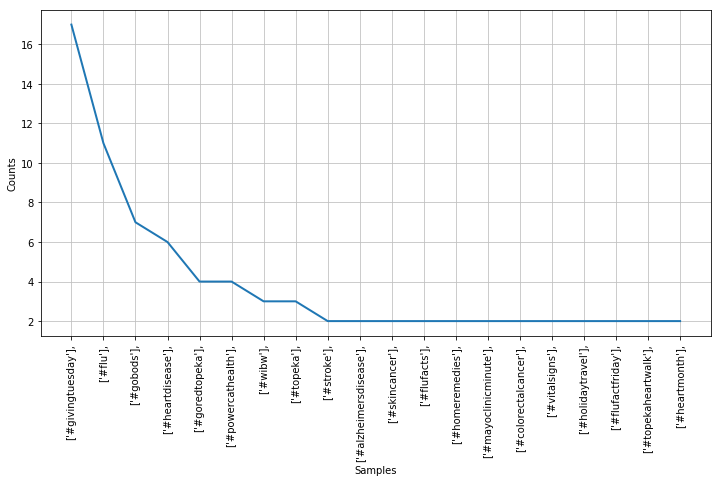

St. Francis:


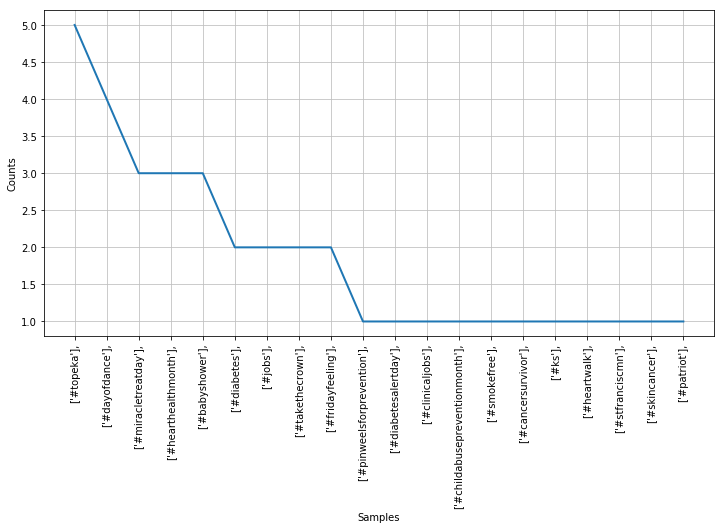

In [65]:
#HASHTAG REFRENCES FREQUENCY 

import matplotlib.pyplot as plt
% matplotlib inline
print sv
# plot word frequency
plt.figure(figsize=(12,6))
svfdist.plot(20)
print sf
# plot word frequency
plt.figure(figsize=(12,6))
sffdist.plot(20)

## Twitter Tagging analysis:

In [66]:
svmention = []

# list one @ mention in a row and save them
for tweet in svtweet:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        svmention.append(['@'+i])
        
sfmention = []

# list one @ mention in a row and save them
for tweet in sftweet:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        sfmention.append(['@'+i])

In [67]:
print sv
for i in svmention:
    print i
    
print sf
for i in sfmention:
    print i

Stormont:
['@randyschwarz']
['@mayoclinic']
['@NorthBayHealth']
['@tmcaznews']
['@StormontVail']
['@medlineplus']
['@CDCTobaccoFree']
['@produceforkids']
['@healthykids']
['@SunflowerGames']
['@TPS_501']
['@CDCHeart_Stroke']
['@CDCgov']
['@healthychildren']
['@MarchofDimesKS']
['@HHSGov']
['@TopekaLibrary']
['@healthychildren']
['@CDCgov']
['@TopekaLibrary']
['@healthychildren']
['@MayoCareNetwork']
['@CDCgov']
['@healthychildren']
['@MayoClinicHS']
['@SAE_KSU']
['@StoptheTexts']
['@CDCgov']
['@Nutrition_gov']
['@CDCgov']
['@MayoClinicHS']
['@healthychildren']
['@SafeKidsKansas']
['@CBSHealth']
['@RalphHipp']
['@MayoClinic']
['@safekids']
['@CDCTobaccoFree']
['@SafeKidsKansas']
['@MayoClinic']
['@medlineplus']
['@CDCgov']
['@MayoClinic']
['@MayoClinic']
['@kansashealthorg']
['@KState']
['@kstatesports']
['@StormontVail']
['@MayoClinicHS']
['@CBSHealth']
['@MayoClinicHS']
['@WEAU13News']
['@MayoClinic']
['@medlineplus']
['@CDCChronic']
['@WashburnUniv']
['@CDCChronic']
['@MayoClinic']
[

In [68]:
#compute frequency distribution for all the TAGS in the tweets

#convert lists to strings
svmention_string = str(svmention)

#lowercase
svmention_string = svmention_string.lower()

#tokenize
svmention_string = svmention_string.split()

svmdist = nltk.FreqDist(svmention_string)
print sv
print svmdist.most_common(10)

#convert lists to strings
sfmention_string = str(sfmention)

#lowercase
sfmention_string = sfmention_string.lower()

#tokenize
sfmention_string = sfmention_string.split()

sfmdist = nltk.FreqDist(sfmention_string)
print sf
print sfmdist.most_common(10)

Stormont:
[("['@mayoclinic'],", 34), ("['@stormontvail'],", 18), ("['@wusports'],", 17), ("['@co_sportsmed'],", 14), ("['@cdcgov'],", 13), ("['@mayoclinichs'],", 11), ("['@wu_football'],", 8), ("['@cdcflu'],", 7), ("['@kstatesports'],", 6), ("['@healthychildren'],", 6)]
St. Francis:
[("['@stfrancistopeka'],", 13), ("['@webmd'],", 6), ("['@american_heart'],", 6), ("['@sclhealth'],", 5), ("['@msnbc_health'],", 5), ("['@womenshealth'],", 3), ("['@healthykshosp'],", 3), ("['@cjonline'],", 3), ("['@stjoesdenver'],", 3), ("['@thechausa'],", 3)]


Stormont:


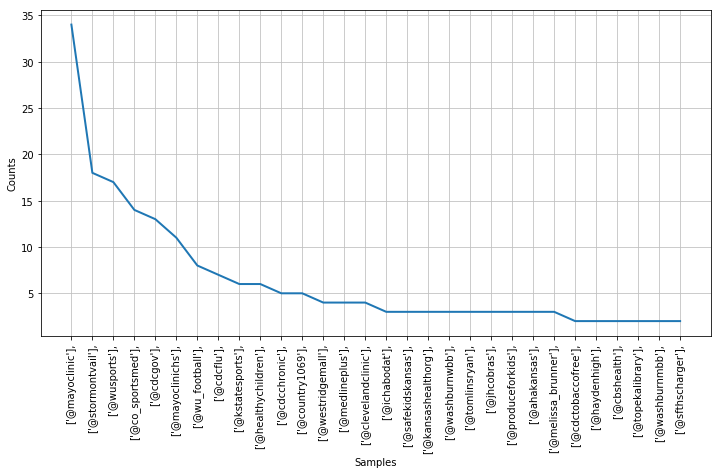

St. Francis:


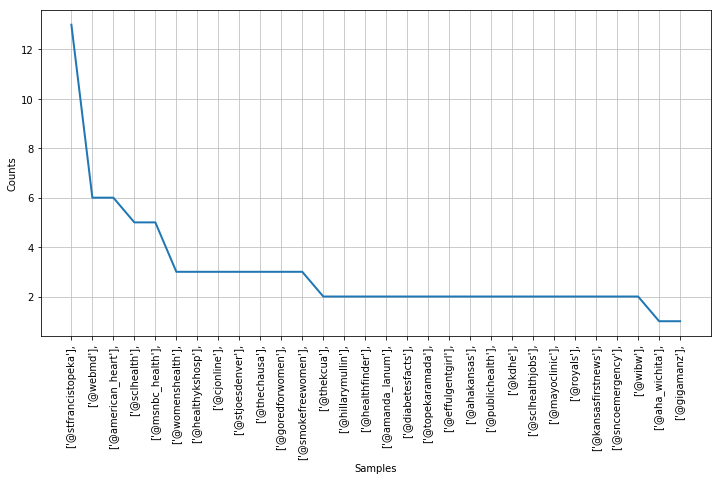

In [69]:
print sv
# plot word frequency  #TAG REFERENCES
plt.figure(figsize=(12,6))
svmdist.plot(30)

print sf
# plot word frequency  #TAG REFERENCES
plt.figure(figsize=(12,6))
sfmdist.plot(30)

## TWEET WORD ANALYSIS:

In [70]:
svtweet2=[]         #an empty list to store the second column - tweet text data
with open('data/twitter/sv_data2.csv', 'r') as svrf:
    svreader = csv.reader(svrf, delimiter=',')
    for row in svreader:
      svtweet2.append(row[1])
    
sftweet2=[]         #an empty list to store the second column - tweet text data
with open('data/twitter/sf_data2.csv', 'r') as sfrf:
    sfreader = csv.reader(sfrf, delimiter=',')
    for row in sfreader:
      sftweet2.append(row[1])
    

In [71]:
print sv
print svtweet2 [2]
print sf
print sftweet2 [2]

Stormont:
Thank you to the Leadership Greater Topeka class of 2018 for their donation to our friends on the Pediatric floor! https://t.co/kTSDYGOnn8
St. Francis:
RT @AHAKansas: .@StFrancisTopeka thanks for making our walk special! #topekaheartwalk https://t.co/SST8Bagtte


In [72]:
from nltk.stem.wordnet import WordNetLemmatizer

#additional stopwords
more_stopwords = set(('stormont', 'vail', 'cotton', 'oneil', 'health', 'cotton-oneil', 'stormont-vail'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords

#convert lists to strings
svtweett = str(svtweet2)
print sv
print svtweet[:5]
print sf
sftweett = str(sftweet2)
print sftweet[:5]

Stormont:
['Tweet', 'Cheryl Mussatto, MS, RD, Diabetes Learning Center, recently contributed some advice to Reader\xe2\x80\x99s Digest on foods tha\xe2\x80\xa6 https://t.co/KD85SaucON', 'Thank you to the Leadership Greater Topeka class of 2018 for their donation to our friends on the Pediatric floor! https://t.co/kTSDYGOnn8', 'Join us for a free, community #skincancer screening event from 8 a.m. to noon, Saturday, May 12, at the Cotton O\xe2\x80\x99Ne\xe2\x80\xa6 https://t.co/ENOx3cGiut', 'Congratulations to Sherrie Shaw, RN, Medical Critical Care, for being a recipient of the DAISY Award for Extraordin\xe2\x80\xa6 https://t.co/VqvfXE8QnD']
St. Francis:
['Tweet', 'This is an exciting day! https://t.co/Wdc8gQ8kPd', 'RT @AHAKansas: .@StFrancisTopeka thanks for making our walk special! #topekaheartwalk https://t.co/SST8Bagtte', 'RT @StJoesDenver: Tips on packing a #healthy #lunch from @SCLHealth! https://t.co/SnXtcJUJ7m https://t.co/l6zlHgTSjj', 'Treating others with kindness costs nothin

In [73]:
#compute frequency distribution for all the TAGS in the tweets

#convert lists to strings
svtweet_string = str(svtweet)
sftweet_string = str(sftweet)
#lowercase
svtweet_string = svtweet_string.lower()
sftweet_string = sftweet_string.lower()
#tokenize
svtweet_string = svtweet_string.split()
sftweet_string = sftweet_string.split()
#Remove stopwords
svtweet_string = [word for word in svtweet_string if word not in extra_stoplist]
sftweet_string = [word for word in sftweet_string if word not in extra_stoplist]
#remove short words
svtweet_string = [ word for word in svtweet_string if len(word) > 3 ]
sftweet_string = [ word for word in sftweet_string if len(word) > 3 ]
svtdist = nltk.FreqDist(svtweet_string)
sftdist = nltk.FreqDist(sftweet_string)
print sv
print svtdist.most_common(10)
print sf
print sftdist.most_common(10)

Stormont:
[('care', 117), ("'congratulations", 88), ('cancer', 85), ('o\\xe2\\x80\\x99neil', 81), ("'the", 80), ('m.d.,', 78), ('baby', 75), ('staff', 70), ('posted', 69), ('learn', 69)]
St. Francis:
[('francis', 86), ('center', 54), ('women', 40), ('great', 39), ('spirit', 35), ('facebook', 35), ("'st.", 34), ('posted', 33), ('dance', 28), ('national', 28)]


Stormont:


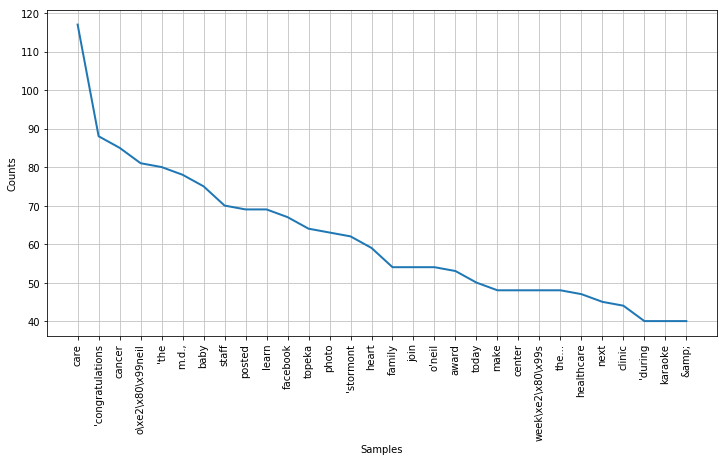

St. Francis:


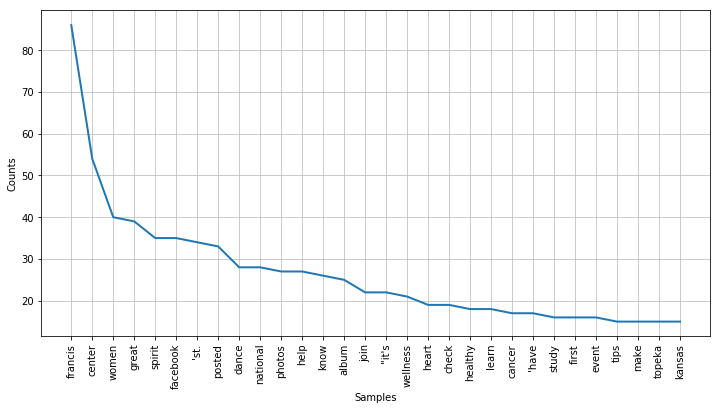

In [74]:
# plot word frequency for WORDS WITHIN TWEETS
plt.figure(figsize=(12,6))
print sv
svtdist.plot(30)
print sf
plt.figure(figsize=(12,6))
sftdist.plot(30)

### Twitter URL Analysis

In [75]:
# FINDING URLS

urlsvtweet = str(svtweet)
svurl = re.findall(r'(https?://[^\s]+)', urlsvtweet)


urlsftweet = str(sftweet)
sfurl = re.findall(r'(https?://[^\s]+)', urlsftweet)


In [76]:
fdist_svurl = nltk.FreqDist(svurl)
print sv
print fdist_svurl.most_common(10)

fdist_sfurl = nltk.FreqDist(sfurl)
print sf
print fdist_sfurl.most_common(10)

Stormont:
[("https://t.\\xe2\\x80\\xa6',", 4), ("https://t.co/\\xe2\\x80\\xa6',", 3), ('https://t.co/ncCSUWissg,', 2), ('http://t.co/pxjTZetJIH', 2), ('https://t.co/b3lKnzpdxt', 2), ('http://t.co/Rx0alIUo2I.', 2), ('http://t.co/zFEB8uett8.', 2), ("https://\\xe2\\x80\\xa6',", 2), ('https://t.co/RKK6J7ubdh', 2), ('http://t.co/qV0b0jWOXm.', 2)]
St. Francis:
[("http://t.co/5RFMYj5',", 2), ("http://t.co/aolQTXyH',", 2), ('http://t.c', 2), ("http://t.co/O6akSBA',", 2), ('http://t.co/871saHy9', 2), ("http://t.co/YX1HyB04',", 2), ("http://t.co/ZJ7OU7Ft',", 1), ('http://t.co/SusblU5aJq', 1), ("http://t.co/mM2msD8XKt',", 1), ("http://t.co/HSYDB1nWjg',", 1)]


### Twitter Demographic Analysis:

In [77]:
import tweepy
import pandas as pd

def lookup_user_list(user_id_list, api):
    full_users = []
    users_count = len(user_id_list)
    try:
        for i in range((users_count / 100) + 1):
            print i
            full_users.extend(api.lookup_users(user_ids=user_id_list[i * 100:min((i + 1) * 100, users_count)]))
        return full_users
    except tweepy.TweepError:
        print 'Something went wrong, quitting...'

consumer_key = 'ncmeZQbgNeW2MXcBZ0i4SFVzA'
consumer_secret = 'QQmsxatDGiQFwdS1WJC50dBOC9cU8Sd50ofsctdgt7tveCX1yC'
access_token = '1228505557-B7MnA1AHnbnRMcQd7jUKG7dbmKG14RhTzX66f5j'
access_token_secret = '6HYVURgAE7pBVp0cC4j03Gg6u3Y7rwop8XMgeIfn9OhKu'

#consumer_key = 'ncmeZQbgNeW2MXcBZ0i4SFVzA'
#consumer_secret = 'QQmsxatDGiQFwdS1WJC50dBOC9cU8Sd50ofsctdgt7tveCX1yC'
#access_token = '1228505557-B7MnA1AHnbnRMcQd7jUKG7dbmKG14RhTzX66f5j'
#access_token_secret = '6HYVURgAE7pBVp0cC4j03Gg6u3Y7rwop8XMgeIfn9OhKu'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

ids = []
for page in tweepy.Cursor(api.followers_ids, screen_name="stormontvail").pages():
    ids.extend(page)

results = lookup_user_list(ids, api)
all_users = [{'id': user.id,
             'Name': user.name,
             'Statuses Count': user.statuses_count,
             'Friends Count': user.friends_count,
             'Screen Name': user.screen_name,
             'Followers Count': user.followers_count,
             'Location': user.location,
             'Language': user.lang,
             'Created at': user.created_at,
             'Time zone': user.time_zone,
             'Geo enable': user.geo_enabled,
             'Description': user.description}
             for user in results]

df = pd.DataFrame(all_users)

df.to_csv('data/twitter/SV All followers.csv', index=False, encoding='utf-8')

0


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


1


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


2


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


3


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


4


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


In [78]:
print sv
df

Stormont:


,Created at,Description,Followers Count,Friends Count,Geo enable,Language,Location,Name,Screen Name,Statuses Count,Time zone,id
0,2009-08-05 02:51:06,,29,585,False,en,,Erin Massek,Buggey8418,64,None,63011026
1,2017-11-02 21:16:06,KPSC is a healthcare organization serving inde...,63,158,False,en,"Topeka, KS",KPSC,kspharmserv,301,Central Time (US & Canada),926196239846334465
2,2009-01-29 18:00:46,A partner for lifelong health: We are committe...,2141,1078,True,en,"Lawrence, KS",Lawrence Memorial,lmhorg,4457,Central Time (US & Canada),19723478
3,2010-04-12 21:40:20,Aldersgate Village is a continuing care commun...,300,468,True,en,"Topeka, KS",Aldersgate Village,Aldersgate_KS,699,Central Time (US & Canada),132302773
4,2016-01-11 22:03:57,Collaborating towards social engagement & acce...,735,3749,False,en,"Kansas, USA",Kelly~Rippel,k_ripTopCity,5428,Pacific Time (US & Canada),4745192227
5,2017-03-26 02:29:41,,18,300,False,en,"Topeka, KS",Jana V,JanaVargas34,3,None,845825049873526785
6,2012-07-04 05:09:08,"RCEMS supports the people of Riley County, Kan...",1829,118,False,en,"Manhattan, KS",Riley County EMS,RileyCoEMS,362,Pacific Time (US & Canada),626179054
7,2008-06-27 02:00:59,Wouldn't it be nice to keep more of your own m...,784,917,False,en,"Basehor, KS",JohnsonFinancialSvcs,LesleyJohnson,2820,Central Time (US & Canada),15250643
8,2014-07-07 13:16:10,,8,728,False,en,"Topeka, KS",Mark Davis,mark_davis5,1,None,2609609426
9,2016-09-01 18:02:13,Official Twitter for the Kansas Capitol Police...,2298,1928,False,en,"Topeka, Kansas, USA",Kansas Capitol Police,KSCapitolPolice,1123,Central Time (US & Canada),771407831337570304


In [79]:
print sv
df.Location.value_counts()

Stormont:


                                  163
Topeka, KS                         78
Topeka, Kansas                     19
Kansas, USA                        13
Kansas                             11
Lawrence, KS                        6
United States                       6
Topeka                              4
Kansas City, MO                     4
Kansas City                         4
Missouri, USA                       3
Emporia, KS                         2
Kansas City, KS                     2
Manhattan, KS                       2
Topeka, Kan.                        2
USA                                 2
Shawnee County, KS, USA             2
Overland Park, KS                   2
topeka ks                           2
Topeka, Kansas                      2
Washington, DC                      2
Houston, TX                         2
Kansas                              2
Midwest                             2
Middlefield, CT                     1
Akron, Ohio USA                     1
Professor of

Stormont:


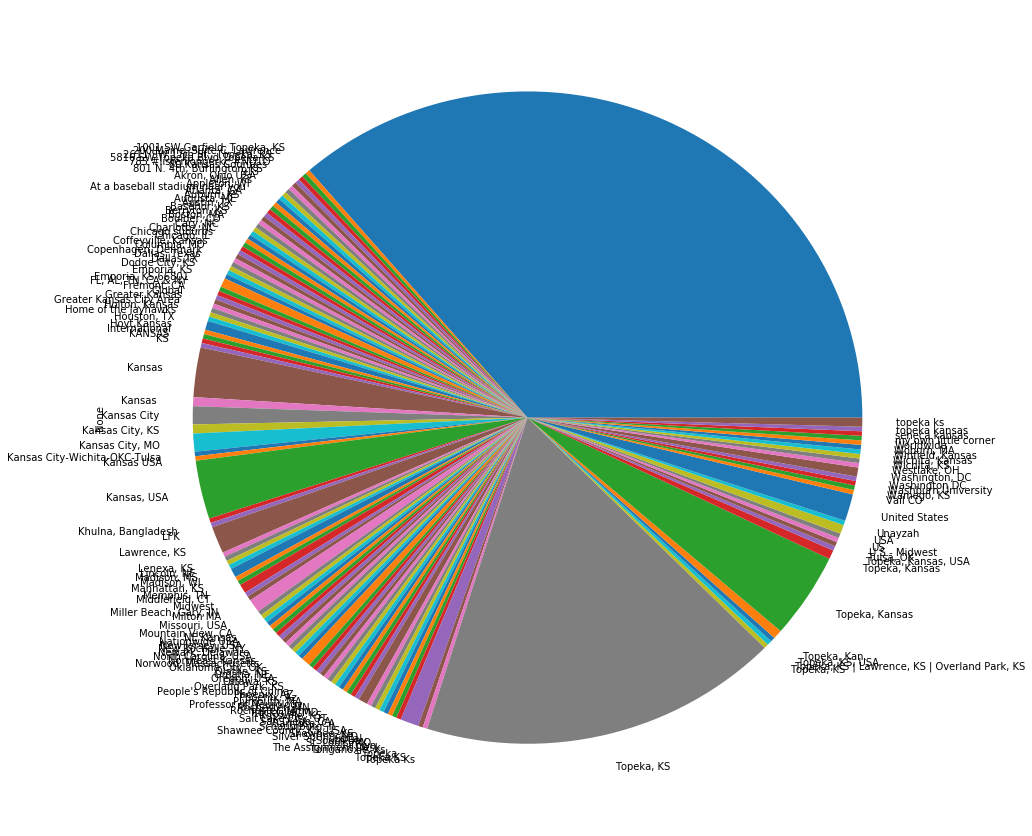

In [80]:
print sv
loc = df.groupby('Location').size()

loc.plot.pie(figsize=(15,15))

In [81]:
def lookup_user_list(user_id_list, api):
    full_users = []
    users_count = len(user_id_list)
    try:
        for i in range((users_count / 100) + 1):
            print i
            full_users.extend(api.lookup_users(user_ids=user_id_list[i * 100:min((i + 1) * 100, users_count)]))
        return full_users
    except tweepy.TweepError:
        print 'Something went wrong, quitting...'

ids = []
for page in tweepy.Cursor(api.followers_ids, screen_name="stfrancistopeka").pages():
    ids.extend(page)

results = lookup_user_list(ids, api)
all_users = [{'id': user.id,
             'Name': user.name,
             'Statuses Count': user.statuses_count,
             'Friends Count': user.friends_count,
             'Screen Name': user.screen_name,
             'Followers Count': user.followers_count,
             'Location': user.location,
             'Language': user.lang,
             'Created at': user.created_at,
             'Time zone': user.time_zone,
             'Geo enable': user.geo_enabled,
             'Description': user.description}
             for user in results]

df = pd.DataFrame(all_users)

df.to_csv('data/twitter/SF All followers.csv', index=False, encoding='utf-8')

0


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


1


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


2


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


3


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


4


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


5


/Users/vinecia1/anaconda2/lib/python2.7/site-packages/urllib3/contrib/pyopenssl.py:304: DeprecationWarning: unicode for buf is no longer accepted, use bytes
  return self.connection.send(data)


In [82]:
print sf
df

St. Francis:


,Created at,Description,Followers Count,Friends Count,Geo enable,Language,Location,Name,Screen Name,Statuses Count,Time zone,id
0,2017-11-02 21:16:06,KPSC is a healthcare organization serving inde...,63,158,False,en,"Topeka, KS",KPSC,kspharmserv,301,Central Time (US & Canada),926196239846334465
1,2017-06-10 02:38:39,Founder | CEO eCoalitions. Healthcare coalitio...,69,749,False,en,United States,Gary Martin,MartinGaryL,297,Central Time (US & Canada),873368784853237760
2,2013-02-28 22:20:51,,14,94,False,en,"Topeka, KS",Vinecia Haugsness,Vineciah,4,None,1228505557
3,2011-10-27 18:42:00,America's premier fire barrier management and ...,110,914,False,en,"Livermore, CA",PREVENT - FIRE BARRIER MANAGEMENT,PREVENT_LSS,1108,Pacific Time (US & Canada),399589023
4,2012-10-23 01:46:20,,57,306,False,en,,AmyS,AmySue96,359,None,898897422
5,2018-01-14 13:52:32,,14,32,True,en,"Topeka, KS",Historic Old Town,TopekaOldTown,11,None,952538926610296832
6,2010-01-25 18:21:00,Workplace #wellness provider that builds #heal...,1860,1586,False,en,"Dallas, Texas",Viverae®,Viverae_Inc,3686,Central Time (US & Canada),108364141
7,2009-01-28 00:35:14,,20,50,False,en,,Callie Grantham,Calliejg,46,Central Time (US & Canada),19627326
8,2018-02-13 15:31:36,Dr. Paul Heath and his team combine advanced d...,22,204,True,en,"Topeka, KS",Dr. Paul Heath,HeathDentistry,148,None,963435493294792704
9,2018-03-06 18:19:47,"I’m a ballet dancer, but only in my bathroom. ...",17,170,False,en,,Madalyn Wren,mwrenrn,62,None,971087966641819649


In [83]:
print sf
df.Location.value_counts()

St. Francis:


                                 124
Topeka, KS                       112
Topeka, Kansas                    44
Kansas                            18
Kansas, USA                       15
United States                     11
Topeka                             9
Kansas City, MO                    7
Denver, CO                         6
Lawrence, KS                       6
Kansas City, KS                    5
Topeka KS                          5
Washington, DC                     4
Overland Park, KS                  4
Kansas City                        4
Topeka Kansas                      4
Kansas                             3
Topeka, Kan.                       3
USA                                3
Charlotte, NC                      3
Lawrence, Kansas                   3
Nebraska, USA                      2
Lincoln, Nebraska                  2
Shawnee County, KS, USA            2
Worldwide                          2
Manhattan, KS                      2
Grand Junction, CO                 2
O

St. Francis:


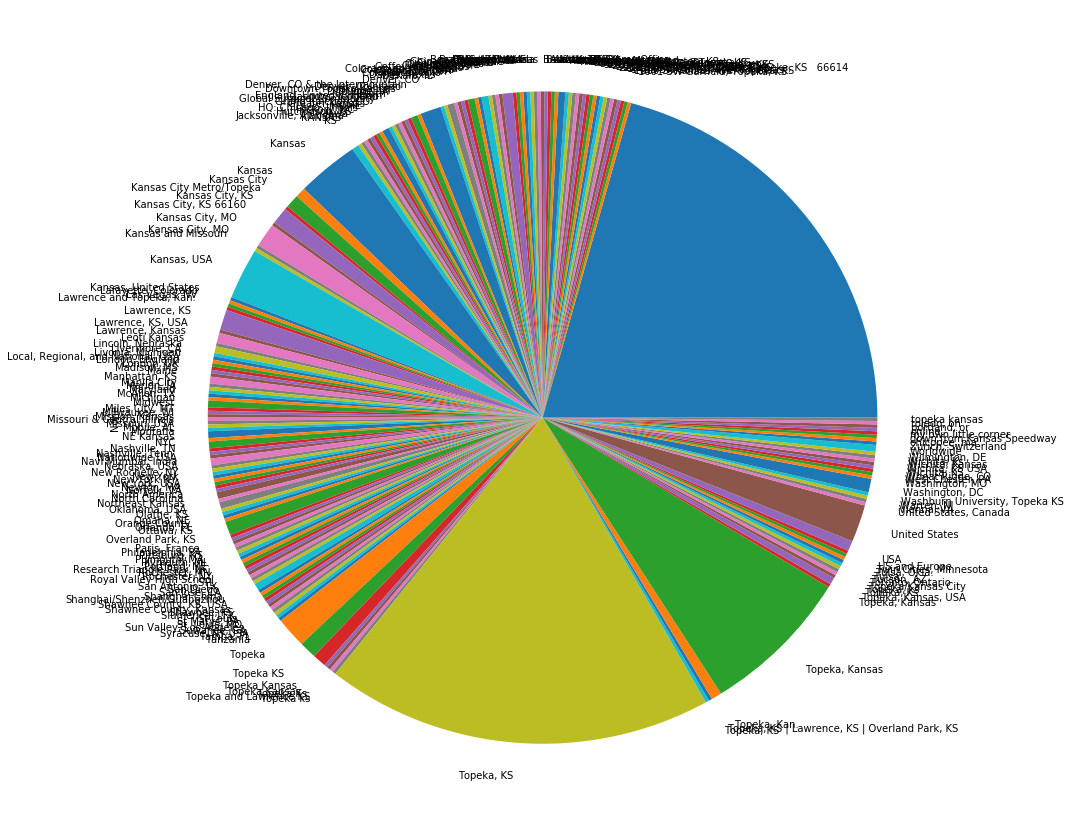

In [84]:
print sf

loc = df.groupby('Location').size()

loc.plot.pie(figsize=(15,15))

# Click on Powerpoint Below to review the Summary Presentation:

(Note:  youtube embeded in python jupyter notebook does not work in github display)

https://youtu.be/tCdUa20vnzQ

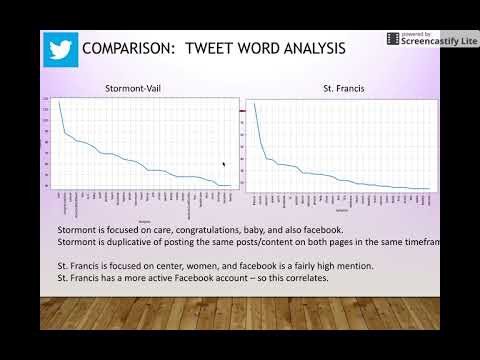

In [105]:
# You can include Youtube video in Ipython notebook
from IPython.display import YouTubeVideo
YouTubeVideo('tCdUa20vnzQ')

# Capstone Summary Analysis and Storytelling

### Stormont-Vail Health vs.  The University of Kansas Health Systems - St. Francis Campus
For my capston I am analyzing the two major healthcare organizations in Topeka, Kansas.    Social Media continues to grow as an influence on todays marketplace for all products.    What does the presence of these two facilities look like on Facebook and Twitter?   What makes us similiar?  What stands apart?    Who is doing what better?    Knowing the recent history of St. Francis recently being almost closed and then purchased by Ardent and KU Medical center,  is that influencing activity?

## GTM Facebook Analysis and Comparison

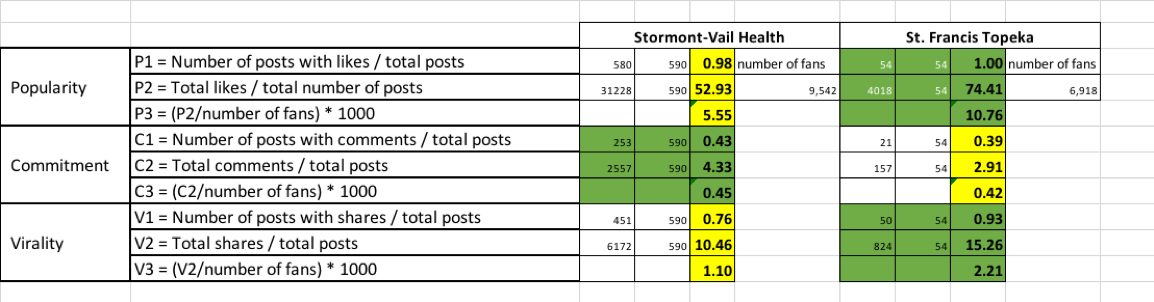

In [85]:
from IPython.display import Image
Image("data/facebook/fb_compare.png")

### GTM Fan Page Metrics

I ran metrics for both Topeka hospital fanpages.   Stormont-Vail Health and St. Francis KU Topeka Campus.    Both facilities are direct competitors in the Topeka Healthcare Market.

Stormont-Vail has always held a 70/30 split of marketshare and is monitoring closesly with St. Francis under new ownership and management.  

Stormont-Vail is the strong and steady which is confirmed by its commitment statistics,  but SF Topeka is the new exciting game in town which explains the popularity and virality statistics.

### Used Facebook Netvizz to export the file and cleaned it up in Gephi to relationships

Stormont Vail has 9400 fans and for the past year I was able to export 550 status updates over the past year and 240 Facebook comments.   Gephi analysis was limited at best (see charts above) - the intersting part was seeing how much more complex the "smaller" but more active community that St. Francis represented.  

### Used Facepager to Export Facebook Statuses from both pages for analysis and comprison

Stormont had 552 posts,  versus St. Francis only had 88<br/>
<br/>
That being said <br/>
Stormont 4.85 comment ratio<br/>
St. Francis 2.3e comment ratio<br/>
<br/>
Stormont had 651.89 like ratio<br/>
St. Francis had 58.85 like ratio<br/>
<br/>
Stormont had 12.47 share ratio<br/>
St. Francis had 10.45 share ratio<br/>
<br/>
Stormont: comment count 2676<br/>
Stormont: share count 6882<br/>
Stormont: like count 35854<br/>
St. Francis: comment count 207<br/>
St. Francis: share cout 920<br/>
St. Francis: like count 5179<br/>
<br/>
These ratios let us know that even though we have vastly different quantities - our ratios of interactions / post - Stormont Vail is ahead.

### Content Analytics - Word Frequency - See Below:

These comparisons are very interesting - Looking for similiarites I find "Care" "patient" "help" <br/>
<br/>
Outside of the similiar words I see that Stormont is more word frequent on services offered and St. Francis is more about touting their university and network strength.<br/>

Stormont:


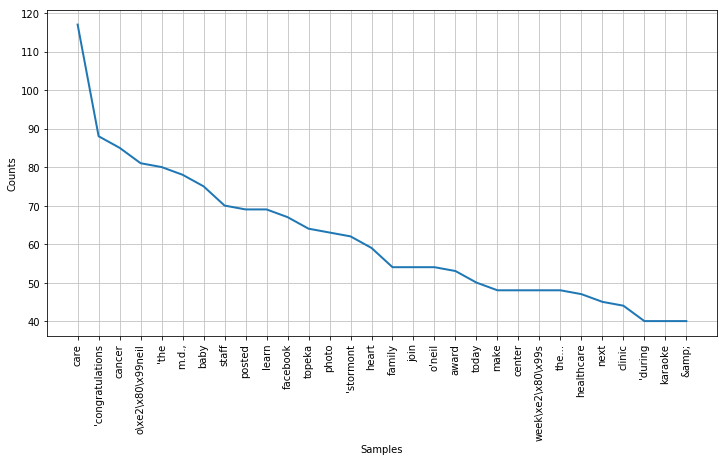

St. Francis:


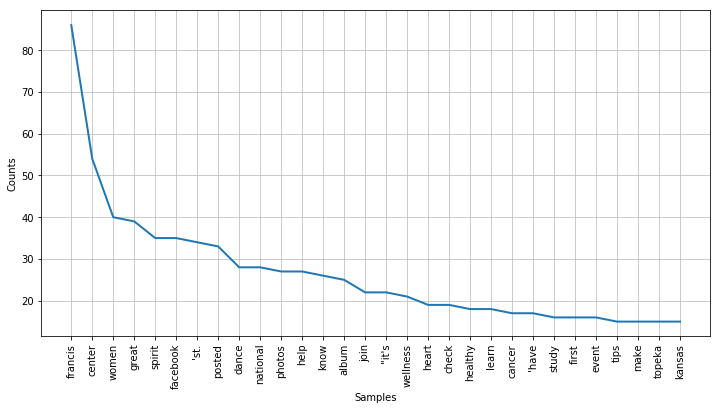

In [90]:
plt.figure(figsize=(12,6))
print sv
svtdist.plot(30)
print sf
plt.figure(figsize=(12,6))
sftdist.plot(30)

### Coherence and Topic Analysis

Stormont:  -6.560586978878148<br/>
St. Francis:  -12.70053298136088<br/>
<br/>
Stormont Has more coherent Topics when examined through the model - see below for the topics / hospital that I extracted:<br/>
<br/>
Stormont:<br/>
baby, today, foundation, make, senior, topeka, kansa, good, welcome, healthwise<br/>
http, baby, event, flu, available, shot, topeka, bit, cancer, family<br/>
heart, care, disease, wellpower, risk, get, family, tip, diabetes, holiday<br/>
topeka, heart, cancer, big, little, help, tournament, golf, patient, pediatric<br/>
school, high, usd, healthwise, nurse, channel, family, wibw, height, recent<br/>
mall, check, healthy, join, west, ridge, today, step, visit, walk<br/>
care, nurse, thank, patient, volunteer, week, day, family, provide, work<br/>
patient, care, award, congratulation, nursing, excellence, year, volunteer, center, clinic<br/>
video, help, week, life, two, like, team, staff, part, karaoke<br/>
free, clinical, register, volunteer, research, kansa, center, athletic, participant, run<br/>
<br/>
St. Francis:<br/>
diabetes, risk, defeatdiabetesmonth, april, active, time, start, help, staying, prevented<br/>
healthy, heart, away, feel, much, time, remember, long, hour, nationalnutritionmonth<br/>
importance, awareness, www, one, http, screening, share, find, learn, gastroenterology<br/>
help, free, work, healthy, day, yesterday, community, area, tip, topeka<br/>
doctor, share, day, please, physician, http, com, visit, comment, like<br/>
thank, doctorsday, doctor, awareness, screening, importance, share, http, right, patient<br/>
hand, cpr, system, hospital, campus, kansa, university, great, course, free<br/>
safety, patient, happy, week, nursing, associate, university, day, risk, kutopeka<br/>
employee, treat, kansa, campus, every, university, show, patient, find, long<br/>
thank, would, care, patient, work, hard, team, like, hospital, week<br/>

# Twitter Analysis

I extracted 1658 tweets from Stormont and 683 from St. Francis.    This was not limited to the year timeframe because I wanted more data to analyze.

### Twitter hashtag analysis



Stormont:


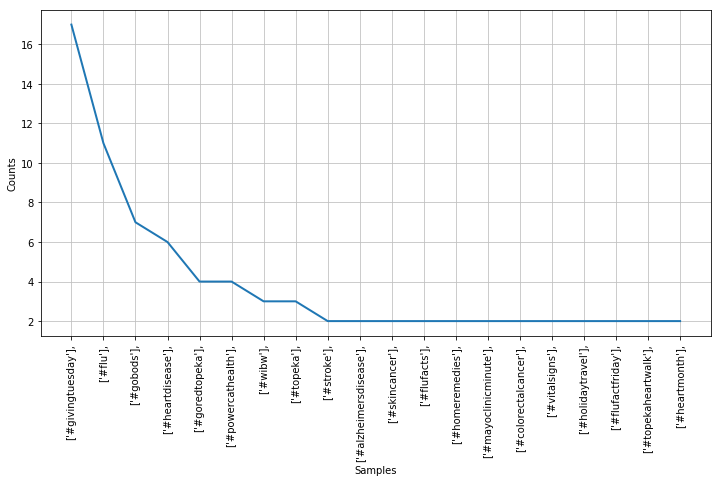

St. Francis:


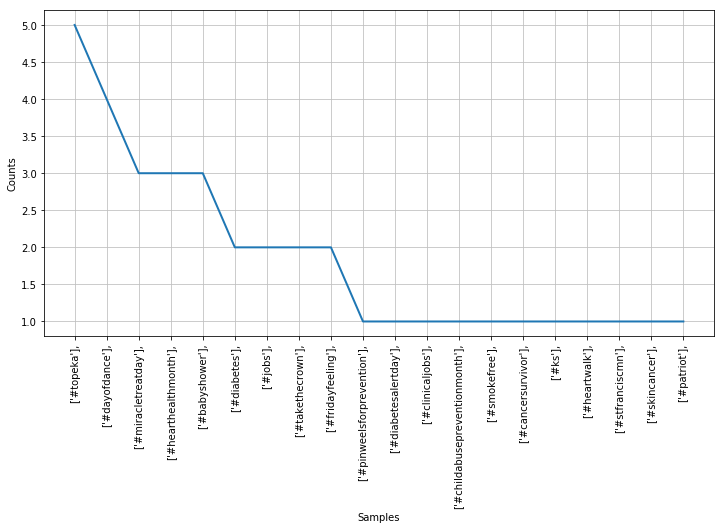

In [91]:
print sv
# plot word frequency
plt.figure(figsize=(12,6))
svfdist.plot(20)
print sf
# plot word frequency
plt.figure(figsize=(12,6))
sffdist.plot(20)

### Twitter Mention Analysis



Stormont:


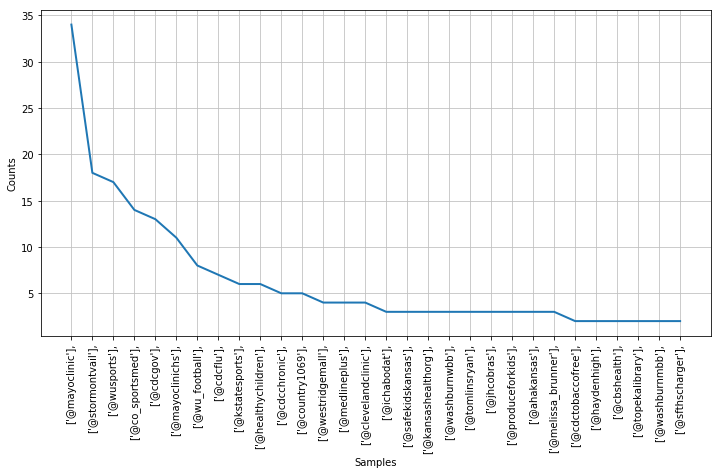

St. Francis:


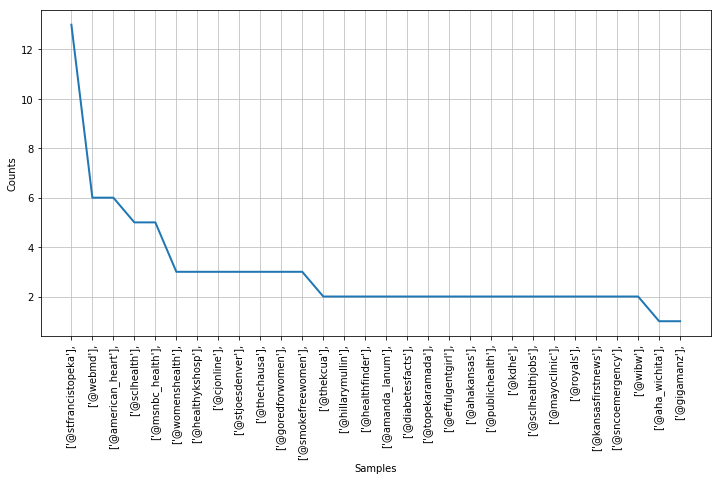

In [92]:
print sv
# plot word frequency  #TAG REFERENCES
plt.figure(figsize=(12,6))
svmdist.plot(30)

print sf
# plot word frequency  #TAG REFERENCES
plt.figure(figsize=(12,6))
sfmdist.plot(30)

### Twitter User Demographics

With Location being a free text field this is harder to extract via catagorization and graphing (see above pie charts).   It is apparant for both favilities over 95% of followers have a location of Kansas, Topeka, Kansas City, or any combination of the above.

# Topeka Healthcare Social Media Conclusion:

Stormont-Vail has always held a 70/30 split of marketshare and is monitoring closesly with St. Francis under new ownership and management.  

Stormont-Vail is the strong and steady which is confirmed by its commitment statistics,  but SF Topeka is the new exciting game in town which explains the popularity and virality statistics.

Stormont-Vail definitely puts in more resources and efforts with their social media presence.  It shows, and it appears to be paying off!  Plurality of content as well as interactiveness with its followers.    Stormont is many steps ahead of St. Francis in social media presence marketing!